In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

/tungstenfs/nobackup/ggrossha/gypafoiv/miniconda3/envs/python_3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/tungstenfs/nobackup/ggrossha/gypafoiv/miniconda3/envs/python_3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

xlim=(5,16)
ylim=(-11, 3.5)

alpha=1
marker='.'
s=1
legend=False
legend_out=False
linewidth=0
x_jitter=0
y_jitter=0
plt.rcParams["figure.figsize"] = (20,20)

In [3]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05), "Significant"] = "FDR<0.05"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [4]:
def plot_MA_s(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["gray", "black"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend,
                          legend_out=legend_out)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
#     sns_plot.set(xlim=xlim, ylim=ylim)
    
    plt.savefig(f"{df_name}.pdf")

In [5]:
def plot_MA(df, df_name):

    """Plot MA"""
    sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                          y=f"logFC_{df_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["gray", "black"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend,
                          legend_out=legend_out)
    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot for {df_name}")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    sns_plot.set(xlim=xlim, ylim=ylim)
    
    plt.savefig(f"{df_name}.pdf")

In [6]:
def merge_df(df_1, df_2):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="right")
    df["Significant"] = "No"
    return df

In [7]:
def compare(df_1_path, df_2_path, df_1_name, df_2_name):
    
    "Combine multiple functions"
    
    df_1 = prepare_df(df_1_path, df_1_name)
    plot_MA_s(df_1, df_1_name)
    df_2 = prepare_df(df_2_path, df_2_name)
    plot_MA(df_2, df_2_name)
    
    df_merged = merge_df(df_1, df_2)
    
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant")
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_1_name)
#     plot_FC_correlation(df_merged, df_1_name, df_2_name, hue="Significant_" + df_2_name)
    
    return df_merged

In [8]:
def plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name):

    df_all = compare(df_1_path, df_2_path, df_1_name, df_2_name)

    df_all["Significant"] = "No"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05), "Significant"] = f"FDR_{df_2_name}<0.05"

    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0) &
               (df_all[f"logFC_{df_2_name}"]>0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogFC_{df_2_name}>0)"
    
    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0) &
               (df_all[f"logFC_{df_2_name}"]<0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0\nlogFC_{df_2_name}<0)"
    print("Significant details:")
    print(pd.DataFrame(df_all["Significant"].value_counts()))
    
    df_all.loc[(df_all[f"FDR_{df_2_name}"]<0.05) &
               (df_all[f"FDR_{df_1_name}"]<0.05) &
               (df_all[f"logFC_{df_1_name}"]>0),
                "Significant"] = f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0)"

    print("\n\nSignificant:")
    print(pd.DataFrame(df_all["Significant"].value_counts()))


    sns_plot = sns.lmplot(x=f"logCPM_{df_2_name}",
                          y=f"logFC_{df_2_name}",
                          data=df_all,
                          fit_reg=False,
                          hue=f"Significant",
                          hue_order=["No", f"FDR_{df_2_name}<0.05", f"FDR_{df_2_name}<0.05\nFDR_{df_1_name}<0.05\nlogFC_{df_1_name}>0)"],
                          palette=["gray", "black", "red"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend,
                          legend_out = legend_out)


    sns_plot = plt.gca()
    sns_plot.set_title(f"MA plot")
    sns_plot.spines['right'].set_visible(True)
    sns_plot.spines['top'].set_visible(True)
    sns_plot.set(xlim=xlim, ylim=ylim)
    
    plt.savefig(f"{df_2_name}__{df_1_name}.pdf")

In [9]:
# Input prefix
small_rna_prefix = "../../01_small_RNA_seq_15_C/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

ips_prefix = "../../03_WAGO_IPs/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

# csr1_ip_prefix = "../../04_csr_1_IP/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

csr1_ip_and_double_mutants_prefix = "../../04_csr1_ip_and_wago_double_mutants/results/filter/DE_htseq_count__1_alignment_per_read__reverse__"

In [10]:
suffix = "/DE_edgeR/final_table_with_gene_info.tsv"

In [11]:
# Input files

# small_RNAs
small_rna__WT__Dpf_3_null_path = small_rna_prefix + "WT__Dpf_3_null" + suffix
small_rna__WT__Dpf_3_null_name = "Dpf_3_null__over__WT"

small_rna__WT__Dpf_3_S784A_path = small_rna_prefix + "WT__Dpf_3_S784A" + suffix
small_rna__WT__Dpf_3_S784A_name = "Dpf_3_S784A__over__WT"

small_rna__WT__mut_2_path = small_rna_prefix + "WT__mut_2" + suffix
small_rna__WT__mut_2_name = "mut_2__over__WT"

# IPs

# WAGO-1
ip__Input_WAGO_1__IP_WAGO_1_path = ips_prefix + "Input_WAGO-1__IP_WAGO-1" + suffix
ip__Input_WAGO_1__IP_WAGO_1_name = "IP_WAGO-1__over__Input_WAGO-1"

# WAGO-3
ip__Input_WAGO_3__IP_WAGO_3_path = ips_prefix + "Input_WAGO-3__IP_WAGO-3" + suffix
ip__Input_WAGO_3__IP_WAGO_3_name = "IP_WAGO-3__over__Input_WAGO-3"

# csr-1
# ip__csr_1_input__csr_1_IP_path = csr1_ip_prefix + "csr-1_input__csr-1_IP" + suffix
# ip__csr_1_input__csr_1_IP_name = "IP_csr-1__over__csr-1_input"

# HW3115: csr-1(gc017[csr-1::3xFLAG::1HA])IV
ip__HW3115_csr_1_input__HW3115_csr_1_IP_path = csr1_ip_and_double_mutants_prefix + "HW3115_INPUT__HW3115_IP" + suffix
ip__HW3115_csr_1_input__HW3115_csr_1_IP_name = "IP_HW3115_csr-1__over__HW3115_csr-1_input"

# 3134 Input over WAGO-1 Input
HW3134_INPUT__over__Input_WAGO_1_path = csr1_ip_and_double_mutants_prefix + "Input_WAGO-1__HW3134_INPUT" + suffix
HW3134_INPUT__over__Input_WAGO_1_name = "HW3134_INPUT__over__WAGO-1_Input"

# 3135 Input over WAGO-1 Input
HW3135_INPUT__over__Input_WAGO_1_path = csr1_ip_and_double_mutants_prefix + "Input_WAGO-1__HW3135_INPUT" + suffix
HW3135_INPUT__over__Input_WAGO_1_name = "HW3135_INPUT__over__WAGO-1_Input"

# Small RNAs dpf-3 null

## Small RNAs dpf-3 null – WAGO-1 over Input

Significant details:
                                                                                                                                             Significant
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_Dpf_3_null__over__WT<0)  1447       
FDR_Dpf_3_null__over__WT<0.05                                                                                                                1183       
No                                                                                                                                           1154       
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_Dpf_3_null__over__WT>0)  147        


Significant:
                                                                                                               Significant
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC

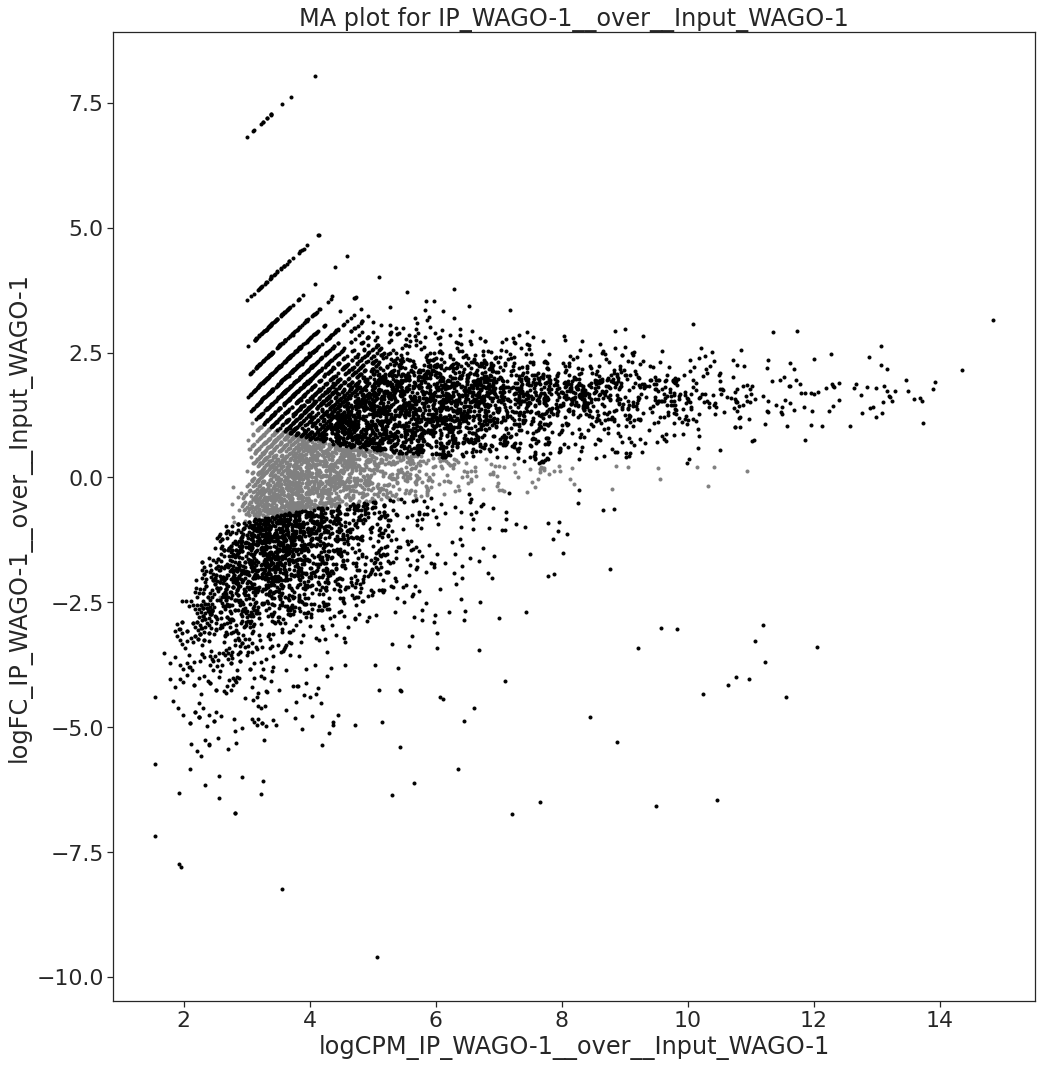

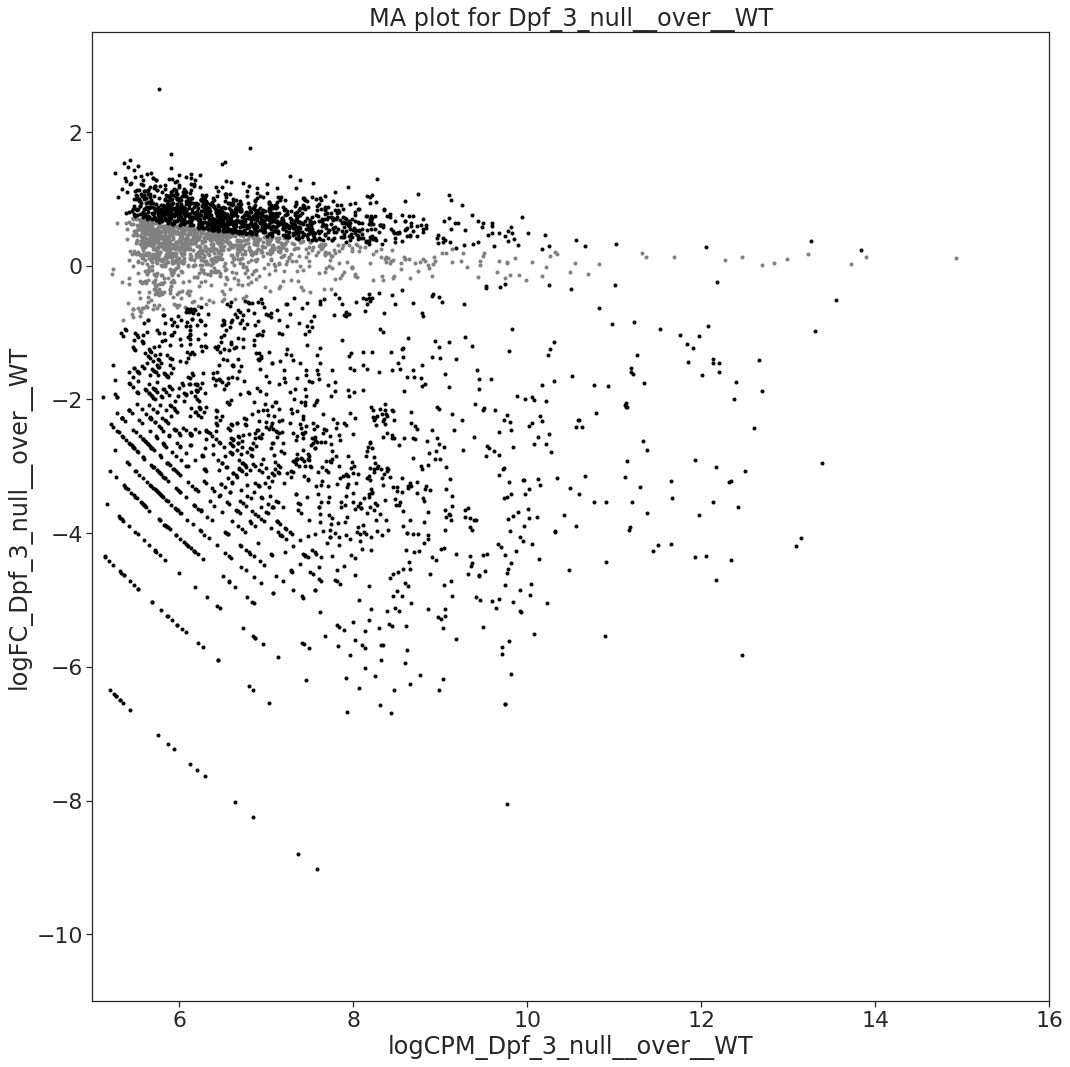

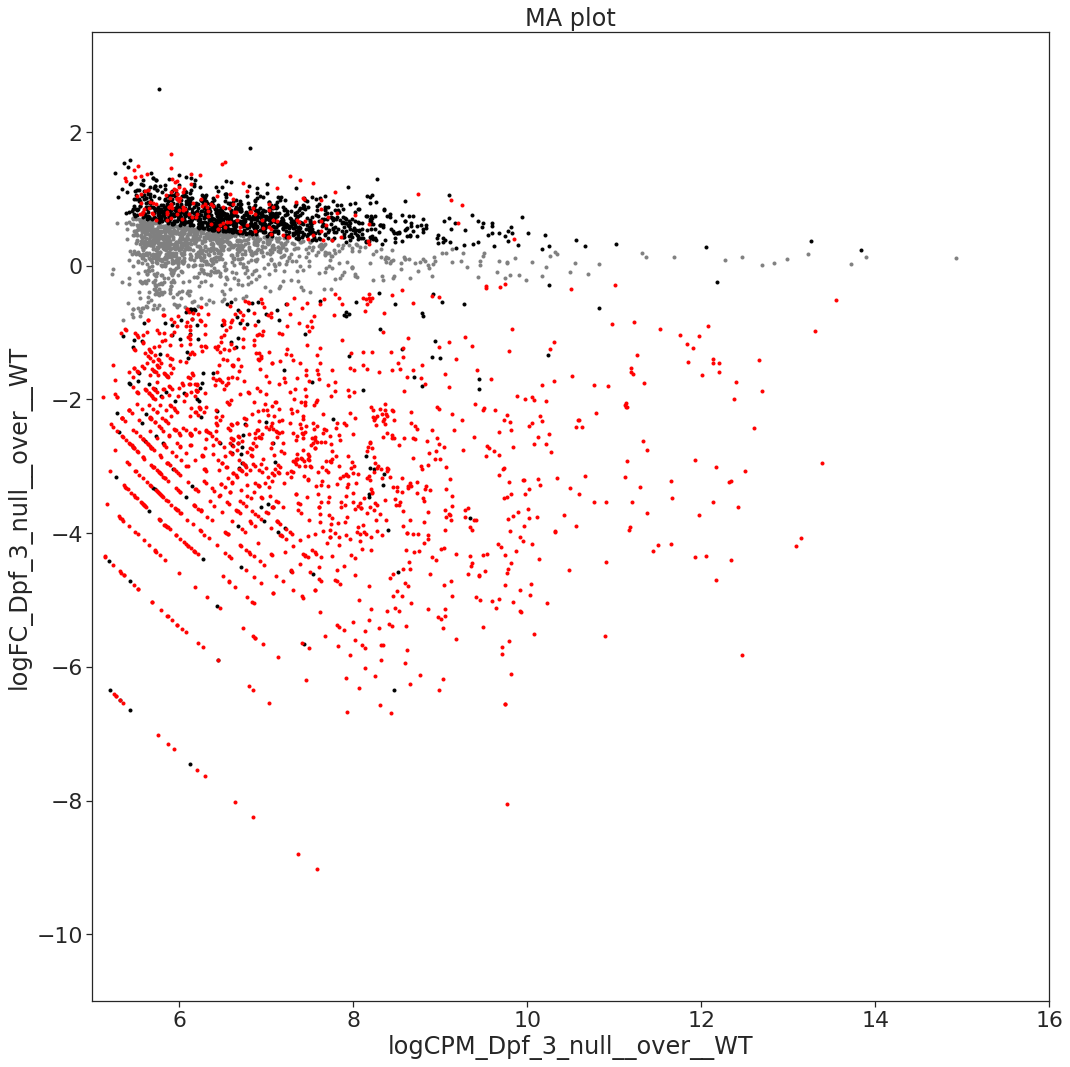

In [12]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs in dpf-3 null – WAGO-3 IP over Input

Significant details:
                                                                                                                                             Significant
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_Dpf_3_null__over__WT<0)  1442       
No                                                                                                                                           1154       
FDR_Dpf_3_null__over__WT<0.05                                                                                                                1143       
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_Dpf_3_null__over__WT>0)  192        


Significant:
                                                                                                               Significant
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC

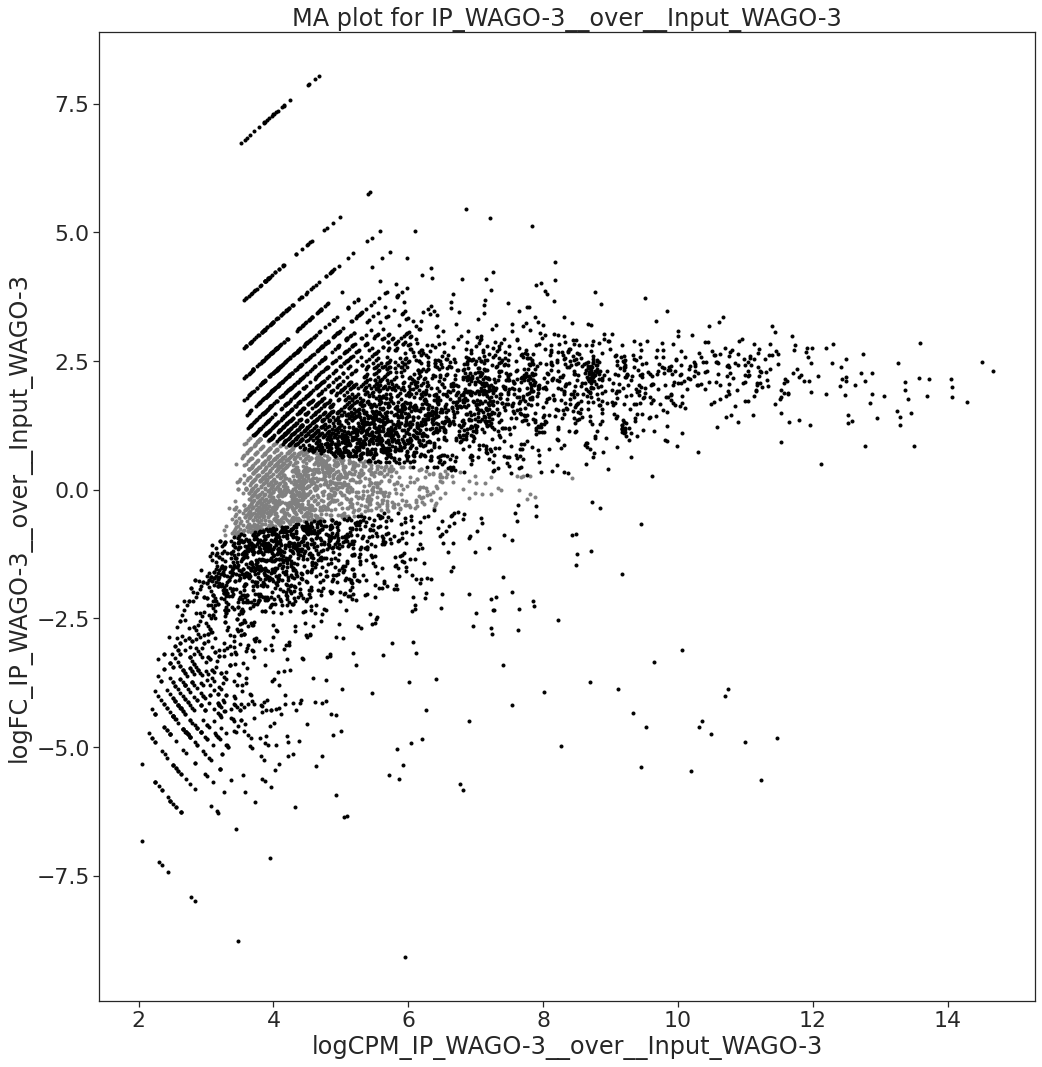

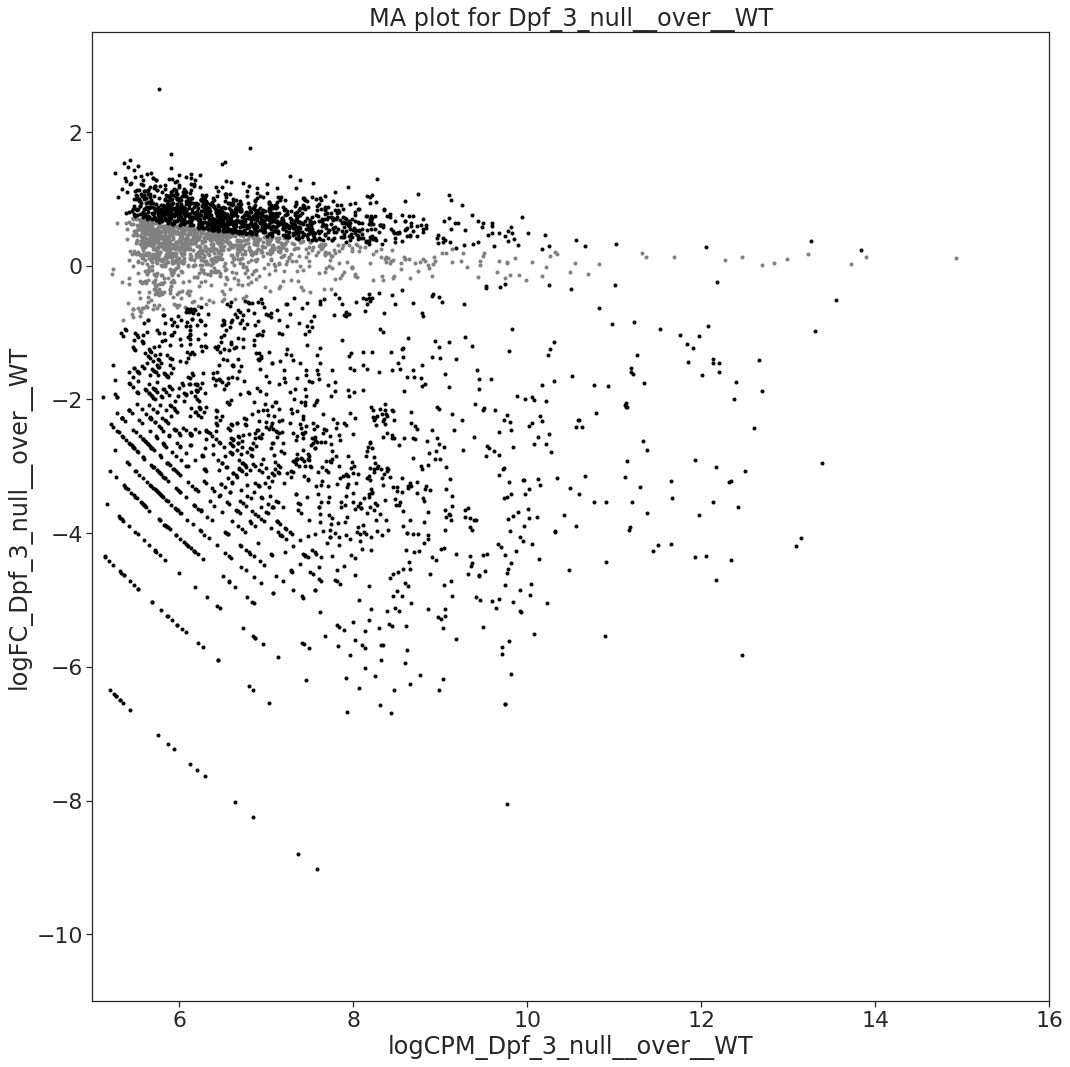

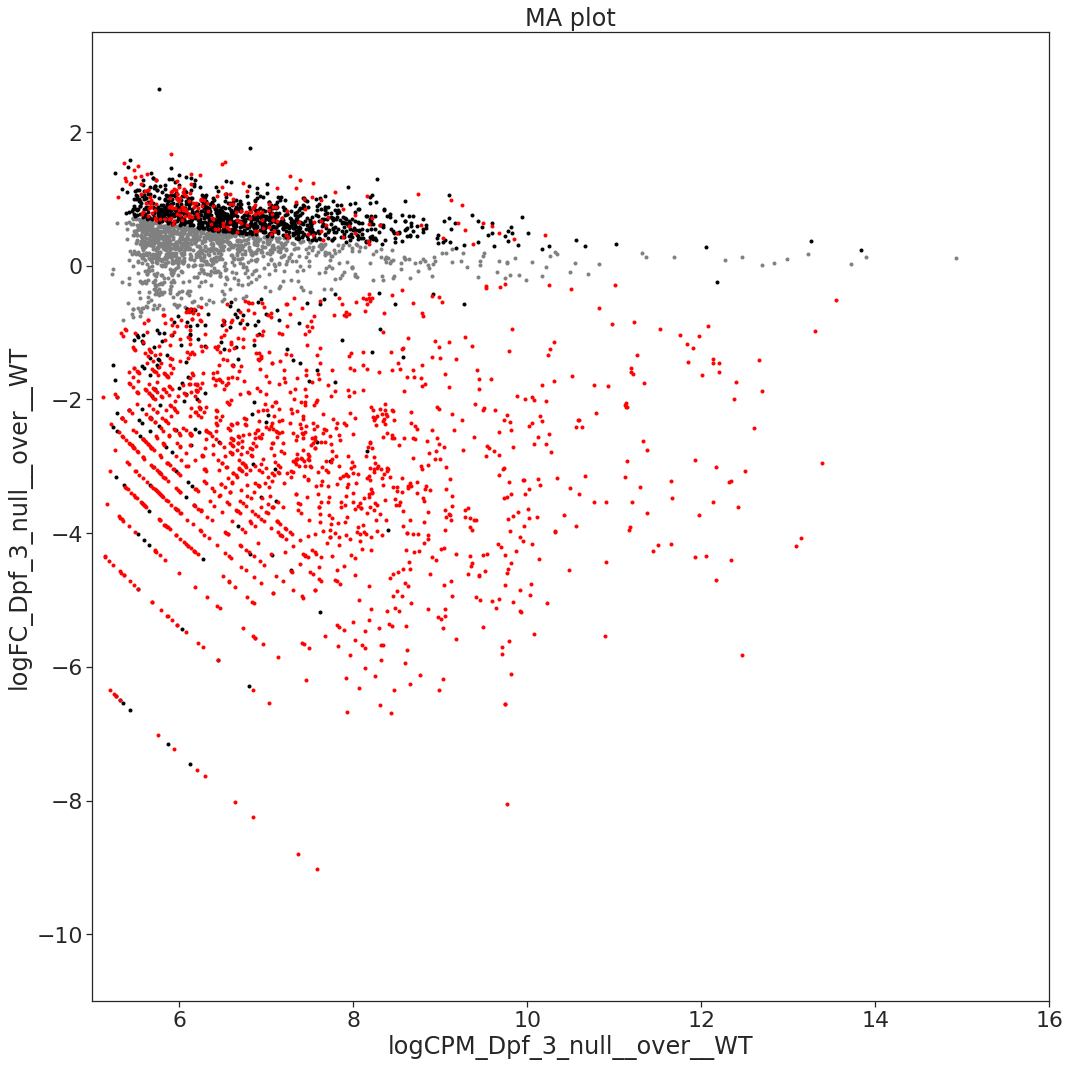

In [13]:
df_1_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_1_name = ip__Input_WAGO_3__IP_WAGO_3_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## dpf-3 null – csr-1 over Input

Significant details:
                                                                                                                                                                     Significant
FDR_Dpf_3_null__over__WT<0.05                                                                                                                                        1611       
No                                                                                                                                                                   1154       
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0.05\nlogFC_IP_HW3115_csr-1__over__HW3115_csr-1_input>0\nlogFC_Dpf_3_null__over__WT>0)  1108       
FDR_Dpf_3_null__over__WT<0.05\nFDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0.05\nlogFC_IP_HW3115_csr-1__over__HW3115_csr-1_input>0\nlogFC_Dpf_3_null__over__WT<0)  58         


Significant:
                                                                               

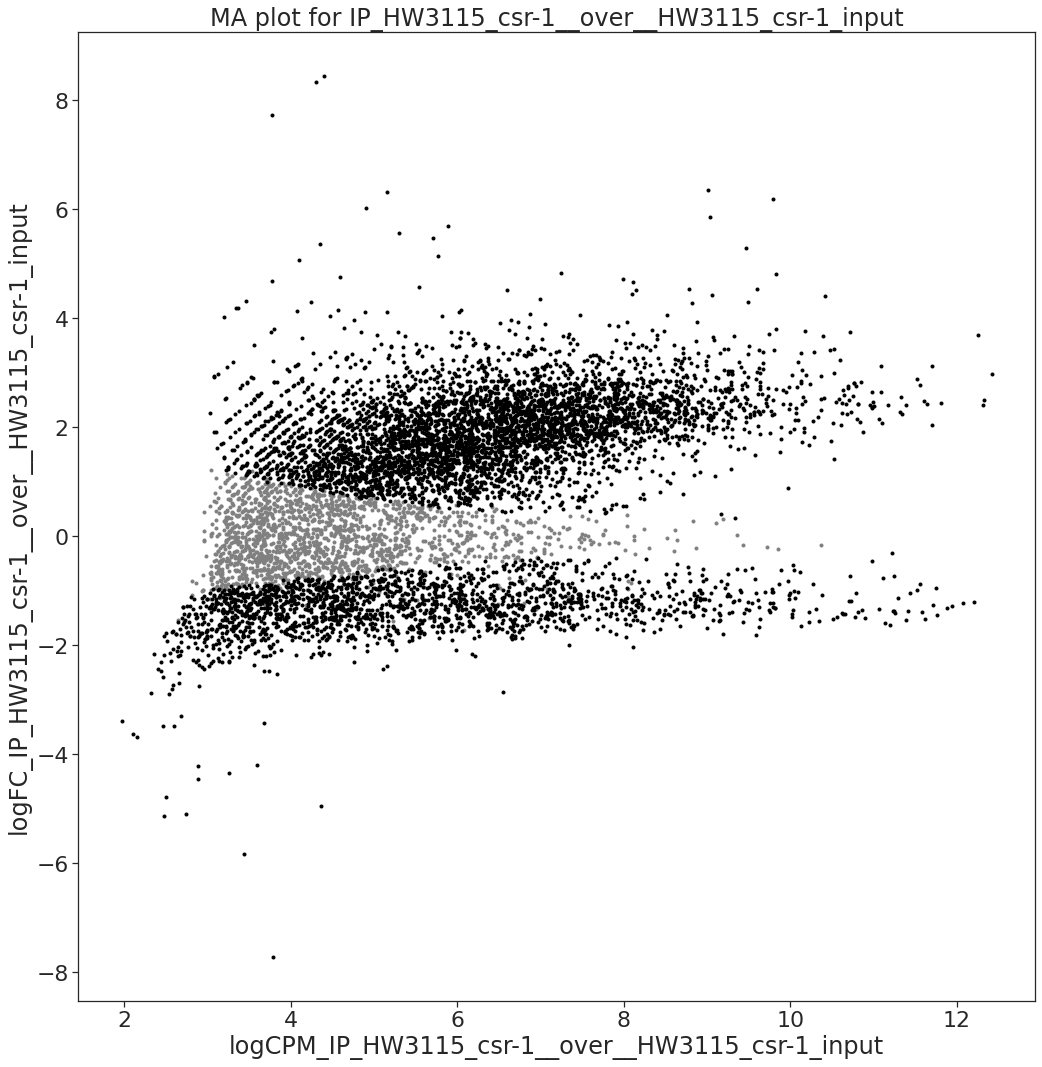

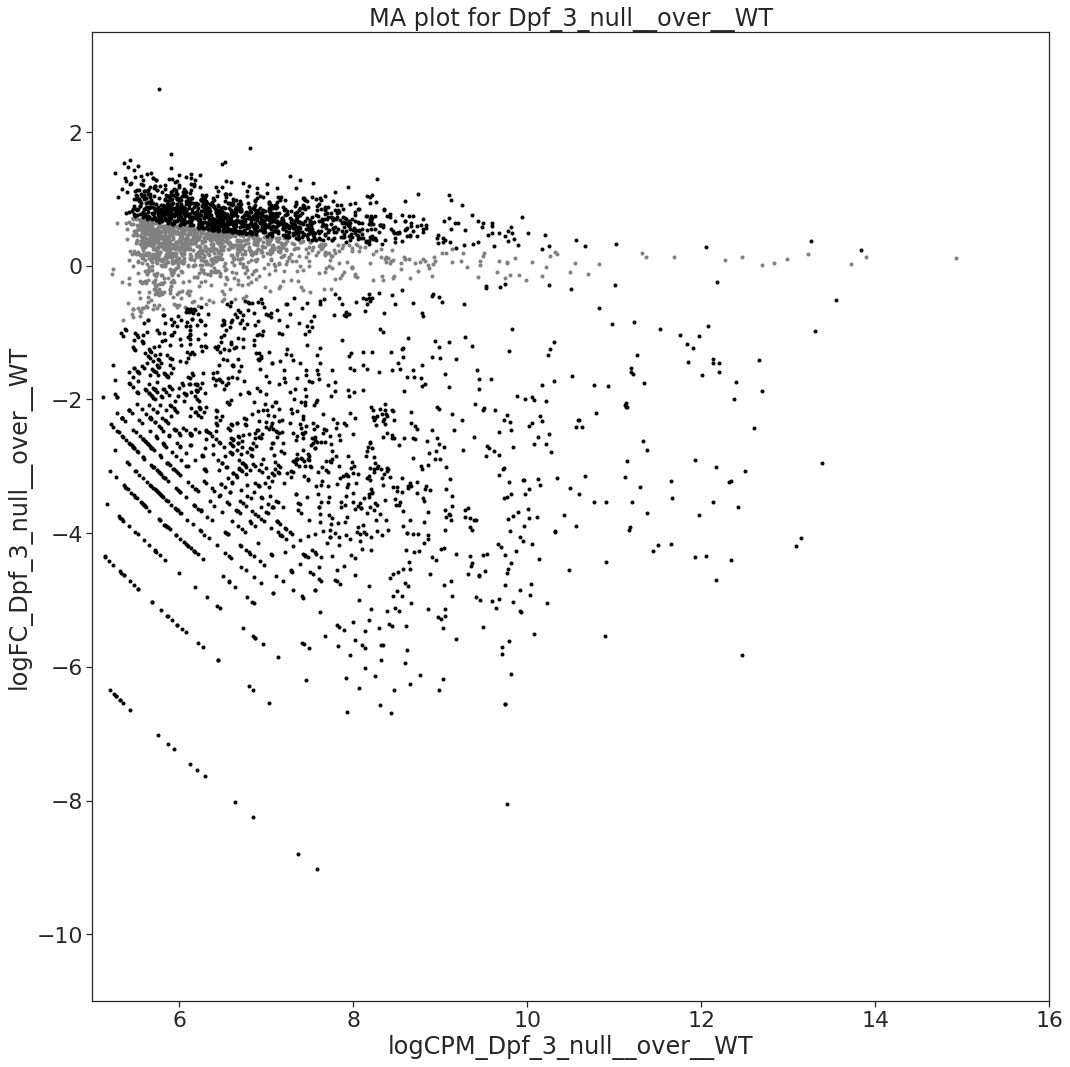

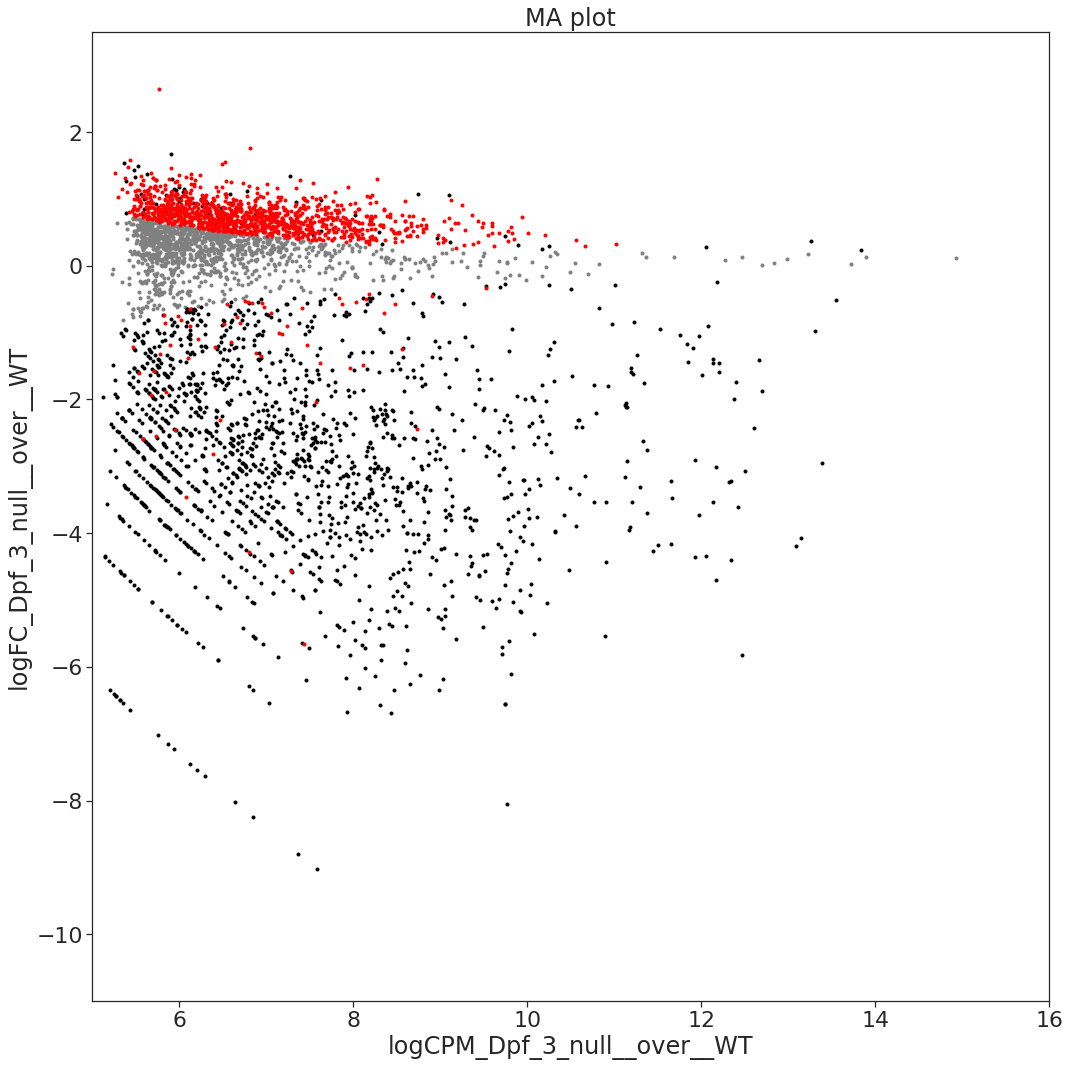

In [14]:
df_1_path = ip__HW3115_csr_1_input__HW3115_csr_1_IP_path
df_1_name = ip__HW3115_csr_1_input__HW3115_csr_1_IP_name

df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

# Small RNAs in DPF-3 null - Mark significant 

[(-11.0, 3.5), (5.0, 16.0)]

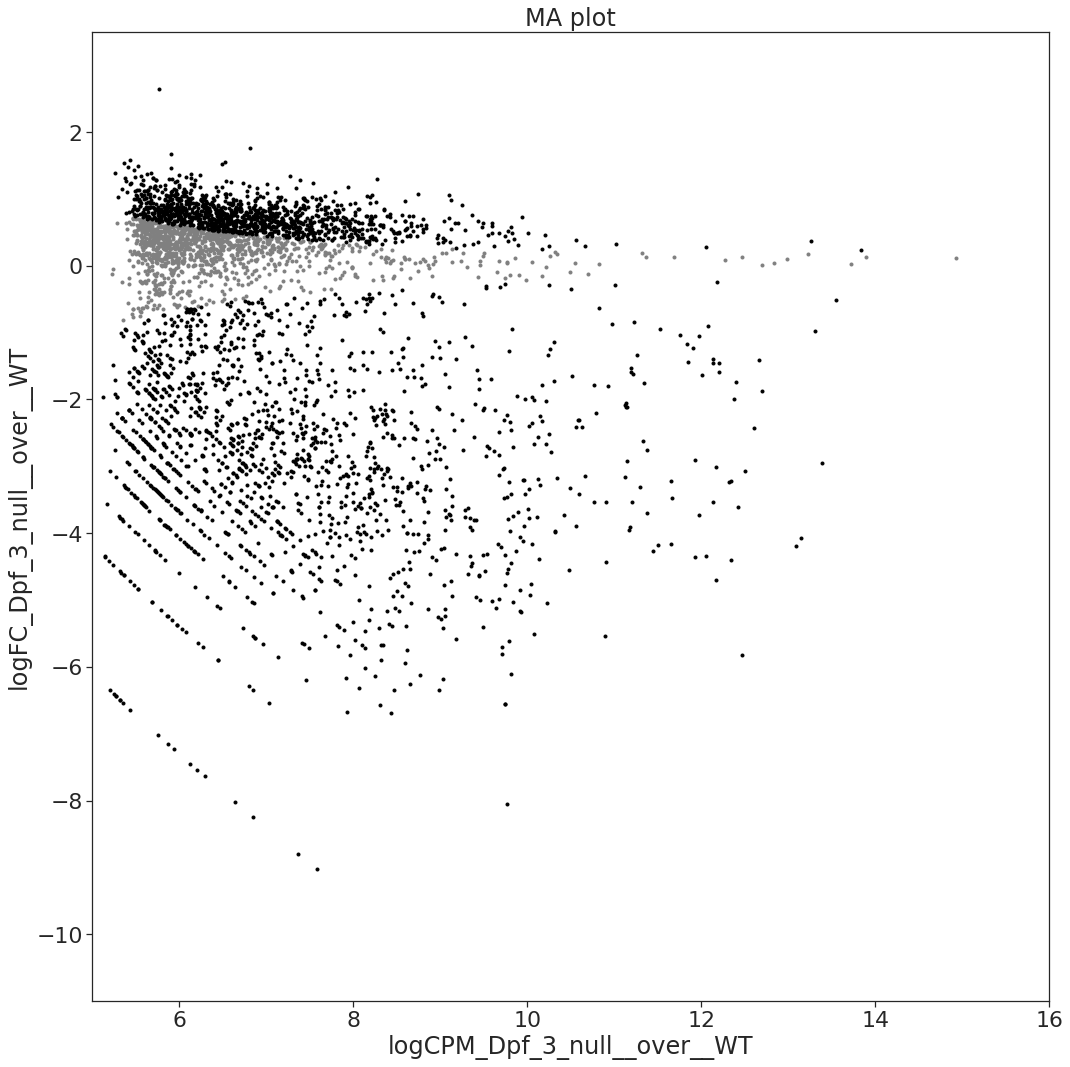

In [15]:
# df_1_path = ip__HW3115_csr_1_input__HW3115_csr_1_IP_path
# df_1_name = ip__HW3115_csr_1_input__HW3115_csr_1_IP_name


df_2_path = small_rna__WT__Dpf_3_null_path
df_2_name = small_rna__WT__Dpf_3_null_name

df = prepare_df(df_2_path, df_2_name)

sns.lmplot(x=f"logCPM_{df_2_name}",
                          y=f"logFC_{df_2_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_2_name}",
                          hue_order=["No", "FDR<0.05"],
                          palette=["gray", "black"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=legend,
                          legend_out=legend_out)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

# plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

In [16]:
HW3128_over_HW3115_specific = pd.read_csv("../correlation_plots_new_and_old_IPs_and_inputs_multimappers/HW3128_over_HW3115_specific.txt", header=None)[0].to_list()

In [17]:
df.head()

id  logFC_Dpf_3_null__over__WT  \
0  I:10238747-10239295:+ -3.346020                     
1  I:10239328-10241663:+ -2.303303                     
2  I:10528240-10529850:- -3.611880                     
3  I:11063165-11063330:- -3.505321                     
4  I:11072235-11072438:- -2.372459                     

   logCPM_Dpf_3_null__over__WT  LR_Dpf_3_null__over__WT  \
0  6.197469                     62.593667                 
1  8.471311                     152.901155                
2  6.942803                     109.502288                
3  5.853918                     50.826569                 
4  5.219526                     19.895683                 

   PValue_Dpf_3_null__over__WT  FDR_Dpf_3_null__over__WT  \
0  2.540691e-15                 1.098730e-14               
1  4.026016e-35                 3.345934e-34               
2  1.259590e-25                 7.859444e-25               
3  1.008986e-12                 3.911563e-12               
4  8.178480e-06                 2.140453e-05               

   taxonomy_id_Dpf_3_null__over__WT gene_name_Dpf_3_null__over__WT  \
0 NaN                                NaN                             
1 NaN                                NaN                             
2 NaN                                NaN                             
3 NaN                                NaN                             
4 NaN                                NaN                             

  sequence_Dpf_3_null__over__WT status_Dpf_3_null__over__WT  \
0  NaN                           NaN                          
1  NaN                           NaN                          
2  NaN                           NaN                          
3  NaN                           NaN                          
4  NaN                           NaN                          

  gene_biotype_Dpf_3_null__over__WT repName_Dpf_3_null__over__WT  \
0  NaN                               CER16-2-LTR_CE                
1  NaN                               Tc3                           
2  NaN                               Tc1                           
3  NaN                               TIR21T5A_CE                   
4  NaN                               MINISAT1_CE                   

  repClass_Dpf_3_null__over__WT repFamily_Dpf_3_null__over__WT  \
0  LTR                           Pao                             
1  DNA                           TcMar-Tc1                       
2  DNA                           TcMar-Tc1                       
3  DNA                           DNA                             
4  Satellite                     Satellite                       

  Significant_Dpf_3_null__over__WT  
0  FDR<0.05                         
1  FDR<0.05                         
2  FDR<0.05                         
3  FDR<0.05                         
4  FDR<0.05

In [18]:
df["Significant_Dpf_3_null__over__WT"].value_counts()

FDR<0.05    2777
No          1154
Name: Significant_Dpf_3_null__over__WT, dtype: int64

In [19]:
df["Significant_Dpf_3_null__over__WT"] = "No"
df.loc[(df["FDR_Dpf_3_null__over__WT"] < 0.05) & (df["logFC_Dpf_3_null__over__WT"]>0), "Significant_Dpf_3_null__over__WT"] = "FDR<0.05 & logFC>0"
df.loc[(df["FDR_Dpf_3_null__over__WT"] < 0.05) & (df["logFC_Dpf_3_null__over__WT"]<0), "Significant_Dpf_3_null__over__WT"] = "FDR<0.05 & logFC<0"
df.loc[df["id"].isin(HW3128_over_HW3115_specific) & (df["Significant_Dpf_3_null__over__WT"] == "No"), "Significant_Dpf_3_null__over__WT"] = "HW3128_over_HW3115_specific & No"
df.loc[df["id"].isin(HW3128_over_HW3115_specific) & (df["FDR_Dpf_3_null__over__WT"] < 0.05) & (df["logFC_Dpf_3_null__over__WT"]>0), "Significant_Dpf_3_null__over__WT"] = "HW3128_over_HW3115_specific & FDR<0.05 & logFC>0"
df.loc[df["id"].isin(HW3128_over_HW3115_specific) & (df["FDR_Dpf_3_null__over__WT"] < 0.05) & (df["logFC_Dpf_3_null__over__WT"]<0), "Significant_Dpf_3_null__over__WT"] = "HW3128_over_HW3115_specific & FDR<0.05 & logFC<0"

[(-11.0, 3.5), (5.0, 16.0)]

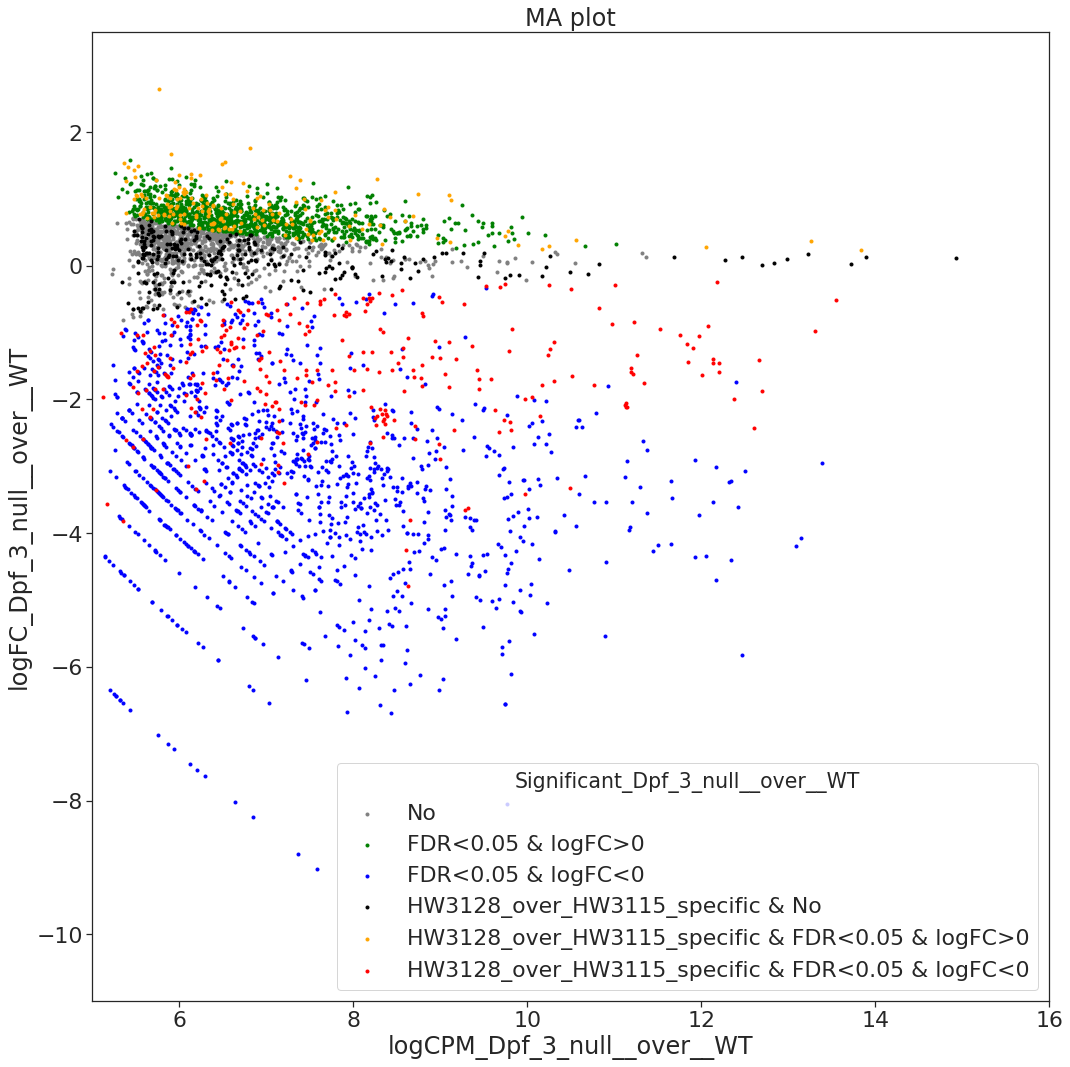

In [20]:
sns.lmplot(x=f"logCPM_{df_2_name}",
                          y=f"logFC_{df_2_name}",
                          data=df,
                          fit_reg=False,
                          hue=f"Significant_{df_2_name}",
                          hue_order=["No", 
                                     "FDR<0.05 & logFC>0",
                                     "FDR<0.05 & logFC<0",
                                     "HW3128_over_HW3115_specific & No",
                                     "HW3128_over_HW3115_specific & FDR<0.05 & logFC>0",
                                     "HW3128_over_HW3115_specific & FDR<0.05 & logFC<0"],
                          palette=["grey", "green", "blue", "black", "orange", "red"],
                          scatter_kws={'alpha':alpha},
                          height=height,
                          aspect=aspect,
                          x_jitter=x_jitter,
                          y_jitter=y_jitter,
                          markers=marker,
                          legend=True,
                          legend_out=False)

sns_plot = plt.gca()
sns_plot.set_title(f"MA plot")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

In [21]:
print(df["Significant_Dpf_3_null__over__WT"].value_counts())

FDR<0.05 & logFC<0                                  1311
FDR<0.05 & logFC>0                                  993 
No                                                  865 
HW3128_over_HW3115_specific & FDR<0.05 & logFC<0    292 
HW3128_over_HW3115_specific & No                    289 
HW3128_over_HW3115_specific & FDR<0.05 & logFC>0    181 
Name: Significant_Dpf_3_null__over__WT, dtype: int64


# Small RNAs in DPF-3 S784A

## 6. Small RNAs in DPF-3 S784A – WAGO-1 IP over Input

Significant details:
                                                                                                                                               Significant
No                                                                                                                                             1371       
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_Dpf_3_S784A__over__WT<0)  1258       
FDR_Dpf_3_S784A__over__WT<0.05                                                                                                                 553        
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_Dpf_3_S784A__over__WT>0)  52         


Significant:
                                                                                                                Significant
No                                                               

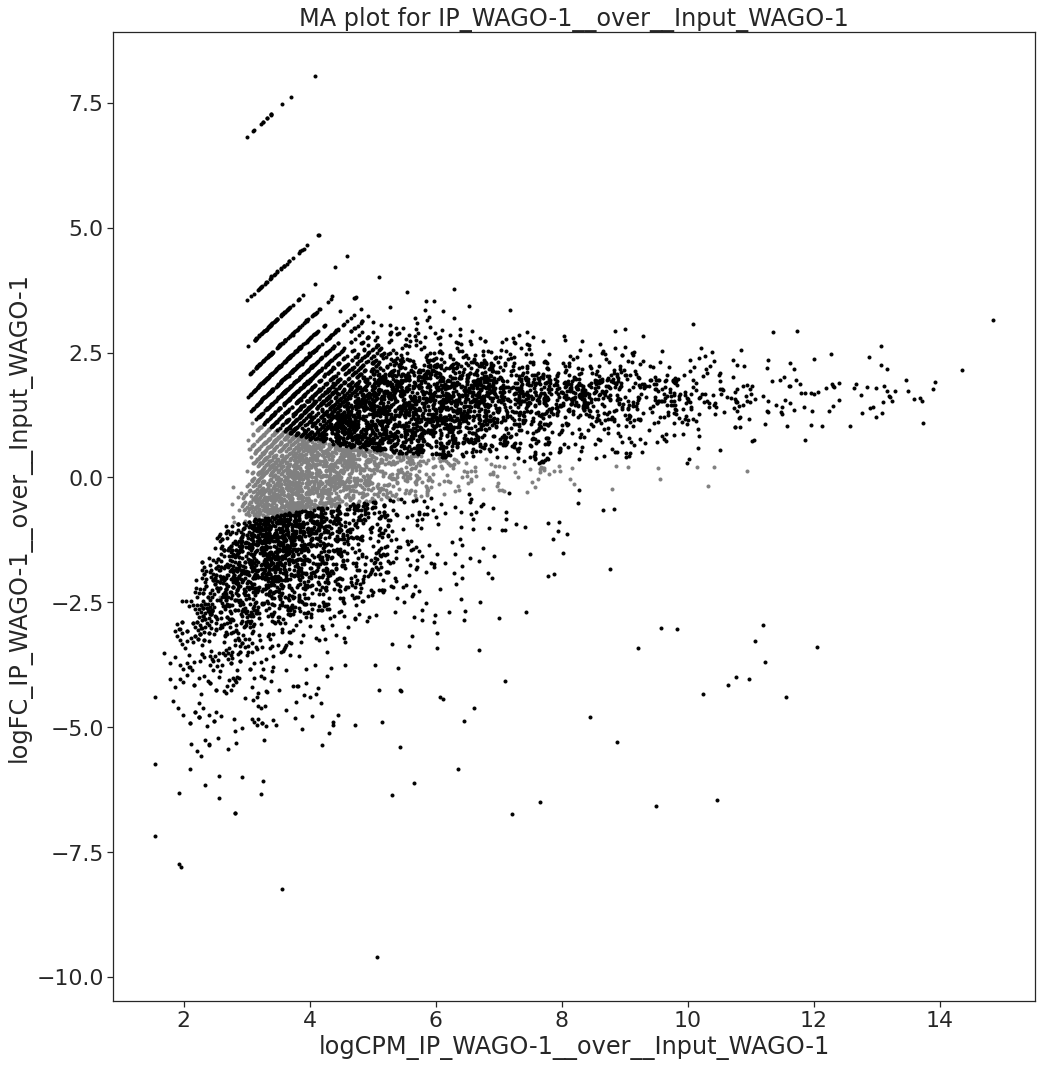

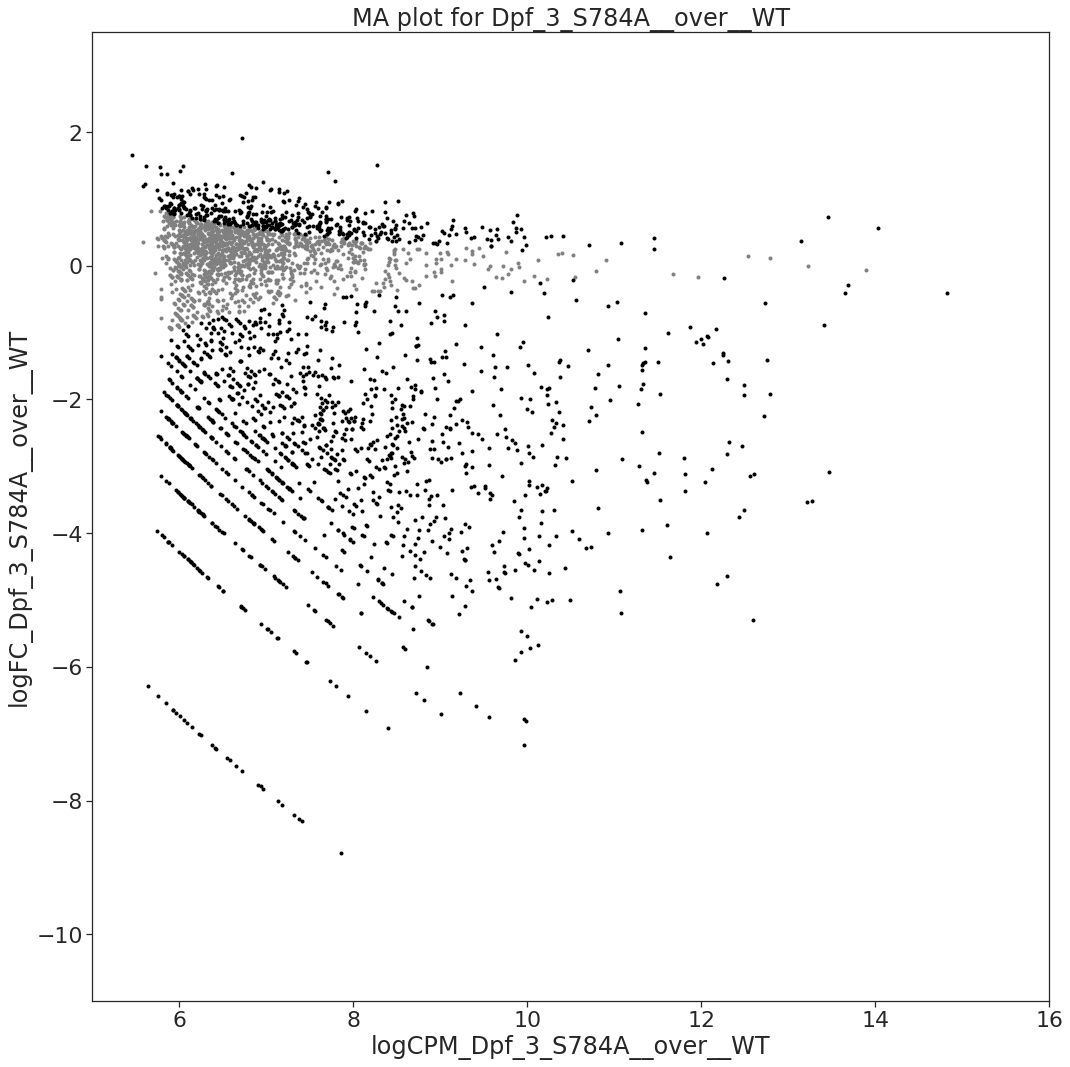

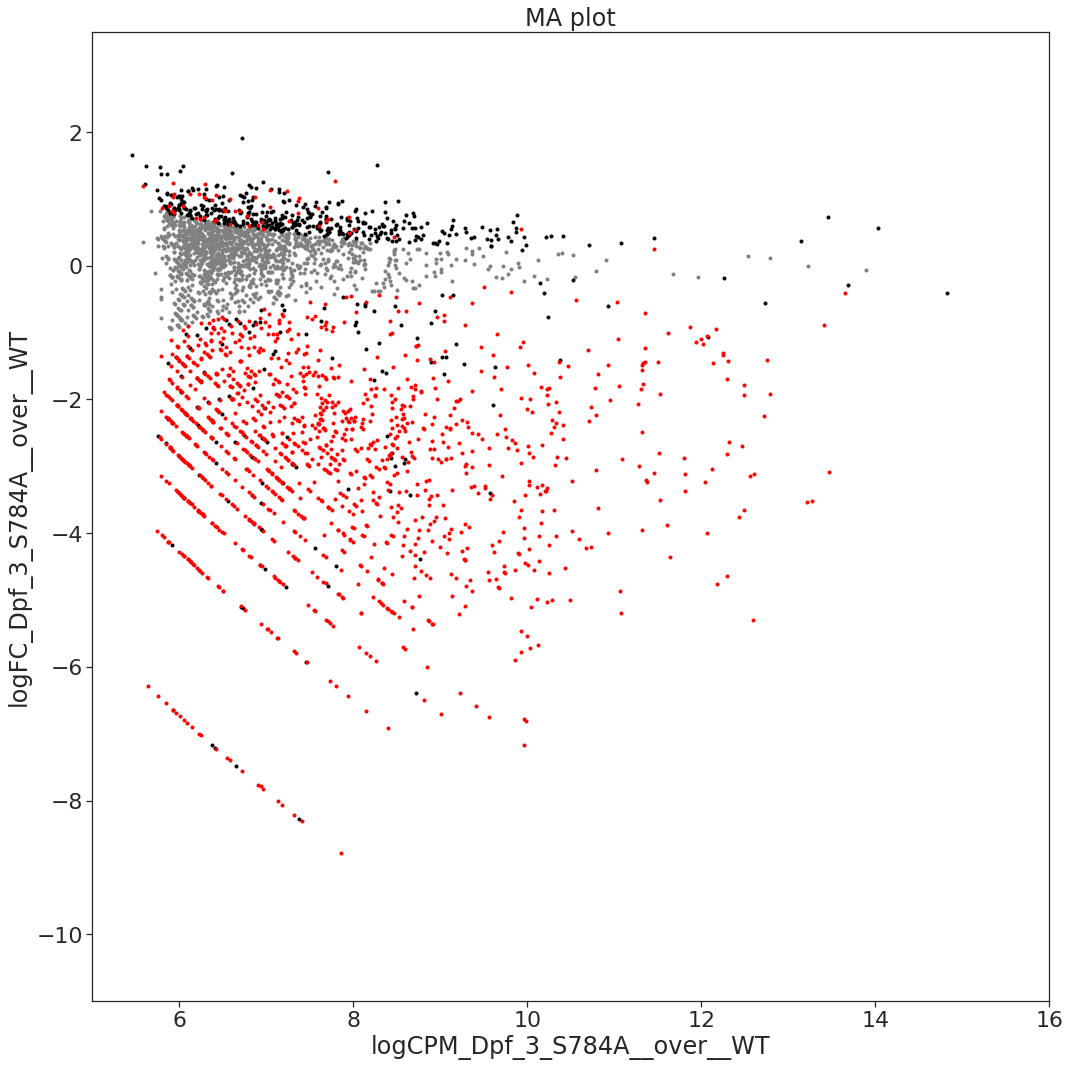

In [22]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = small_rna__WT__Dpf_3_S784A_path
df_2_name = small_rna__WT__Dpf_3_S784A_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs in DPF-3 S784A – WAGO-3 bound IP over Input

Significant details:
                                                                                                                                               Significant
No                                                                                                                                             1371       
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_Dpf_3_S784A__over__WT<0)  1276       
FDR_Dpf_3_S784A__over__WT<0.05                                                                                                                 506        
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_Dpf_3_S784A__over__WT>0)  81         


Significant:
                                                                                                                Significant
No                                                               

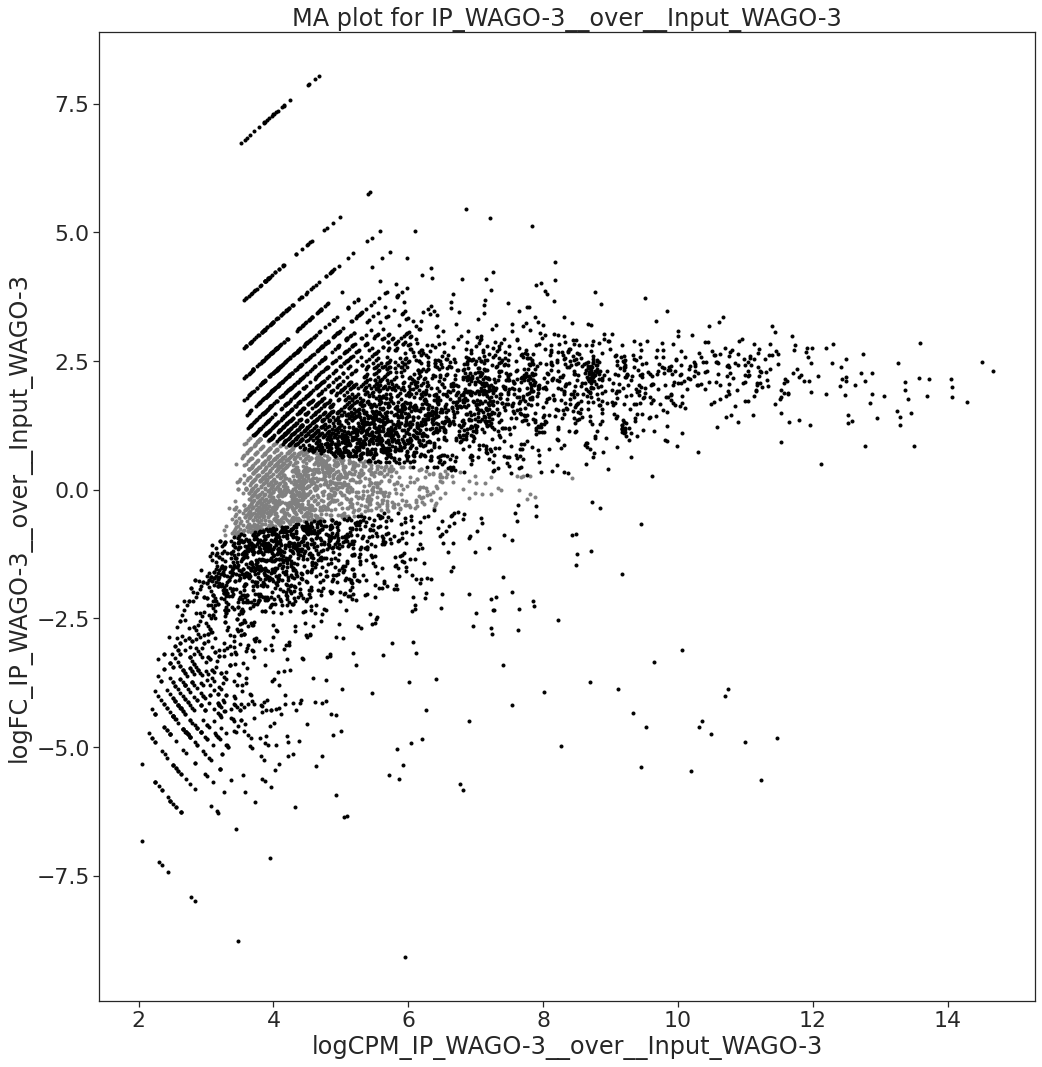

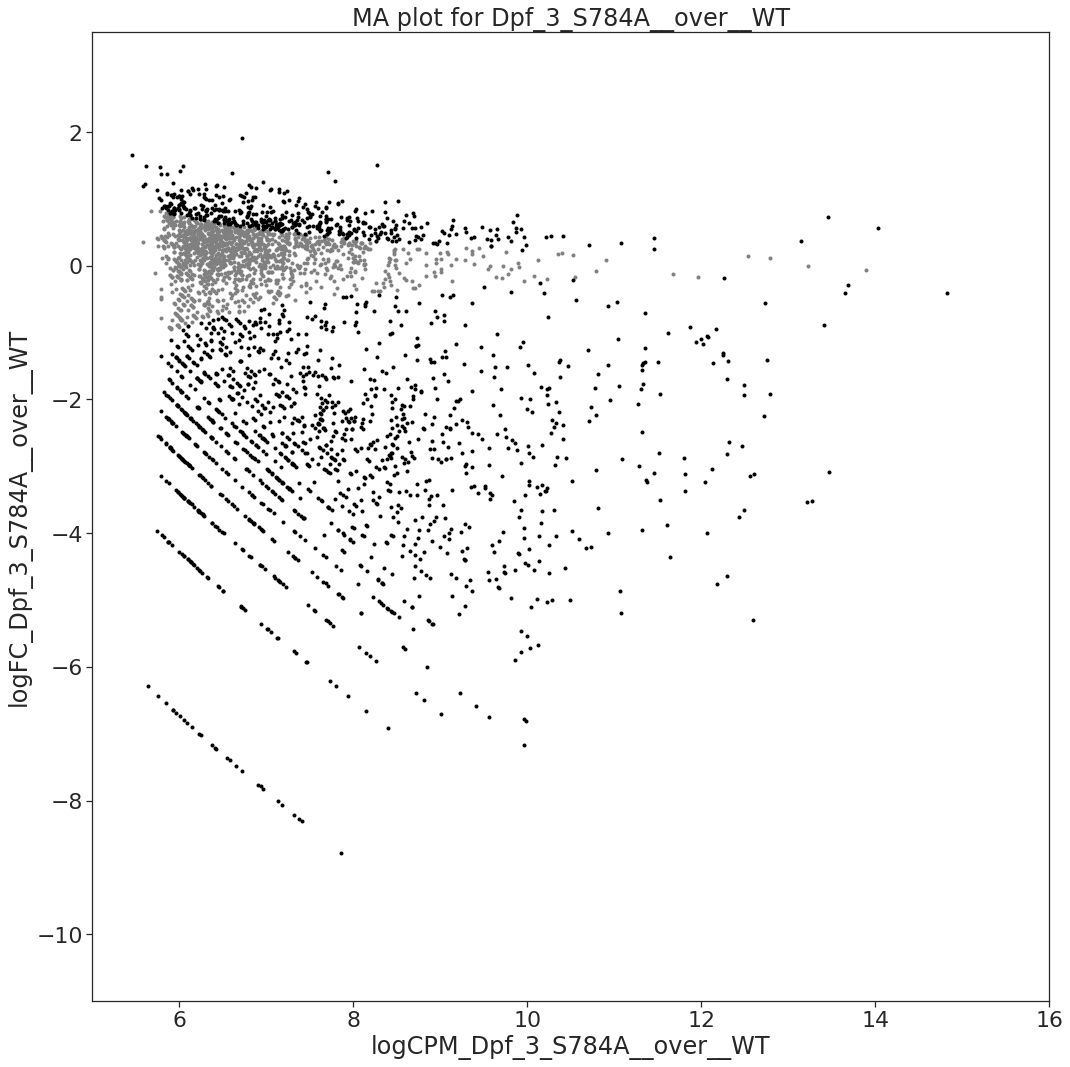

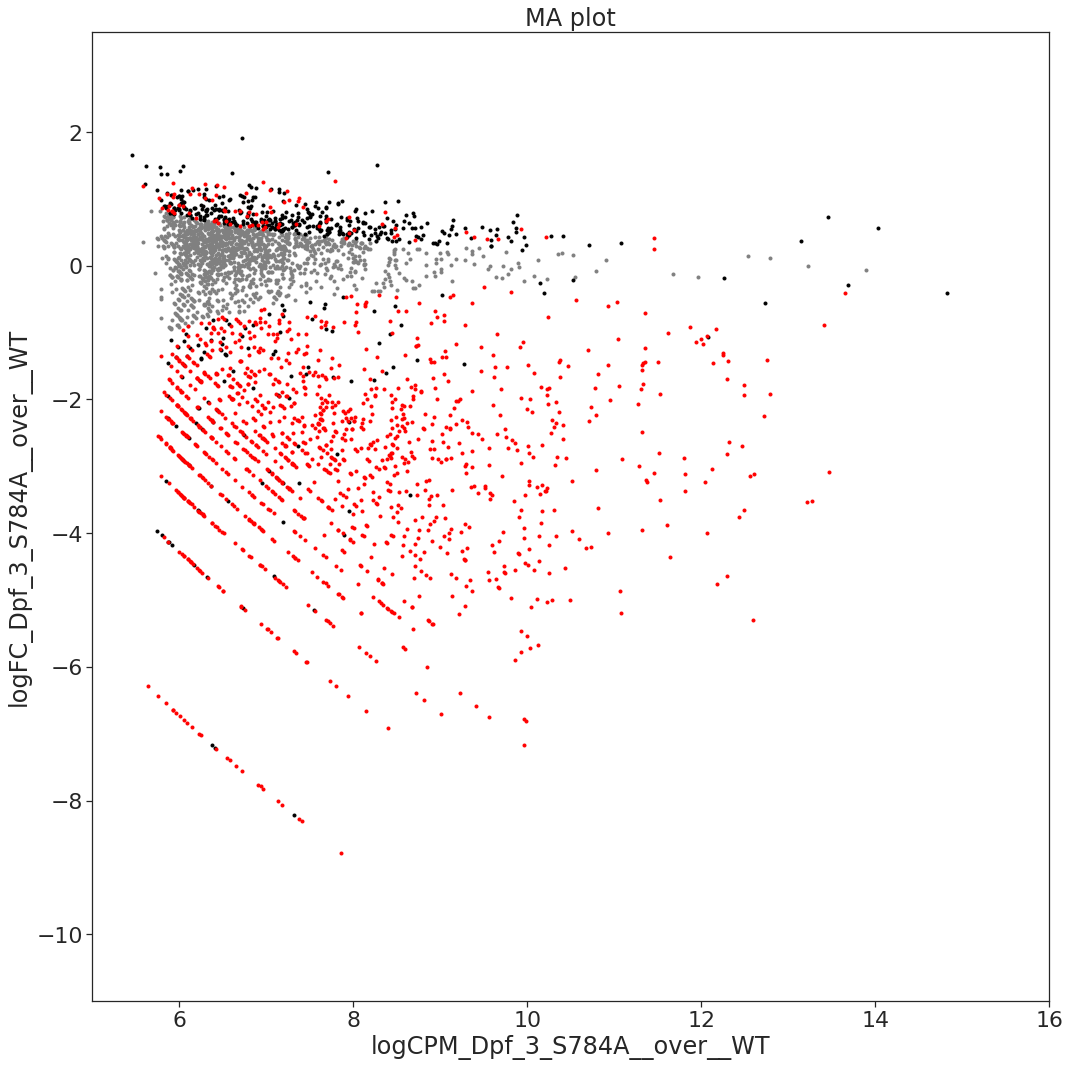

In [23]:
df_1_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_1_name = ip__Input_WAGO_3__IP_WAGO_3_name

df_2_path = small_rna__WT__Dpf_3_S784A_path
df_2_name = small_rna__WT__Dpf_3_S784A_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs dpf-3 S784A – csr-1 over Input

Significant details:
                                                                                                                                                                       Significant
FDR_Dpf_3_S784A__over__WT<0.05                                                                                                                                         1396       
No                                                                                                                                                                     1371       
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0.05\nlogFC_IP_HW3115_csr-1__over__HW3115_csr-1_input>0\nlogFC_Dpf_3_S784A__over__WT>0)  420        
FDR_Dpf_3_S784A__over__WT<0.05\nFDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0.05\nlogFC_IP_HW3115_csr-1__over__HW3115_csr-1_input>0\nlogFC_Dpf_3_S784A__over__WT<0)  47         


Significant:
                                                                     

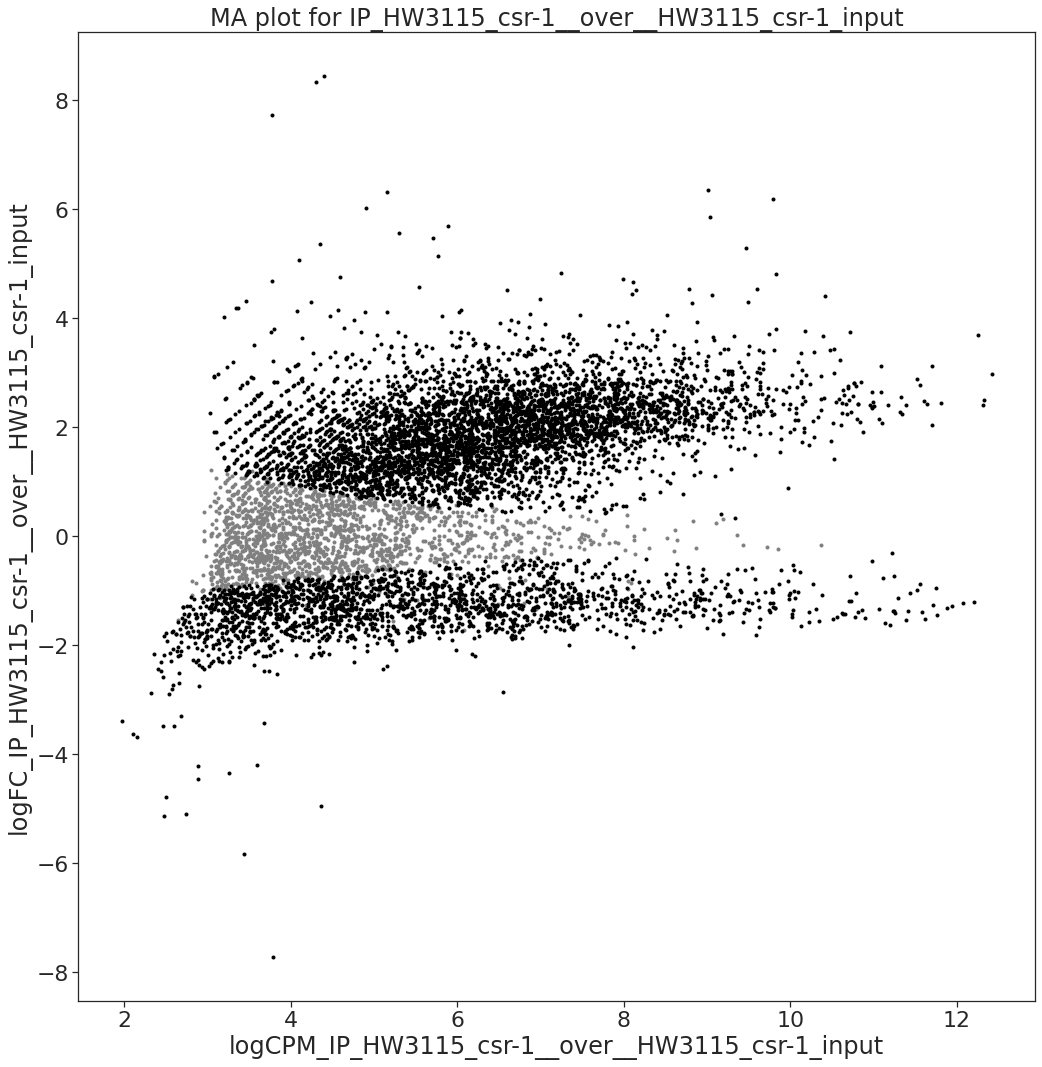

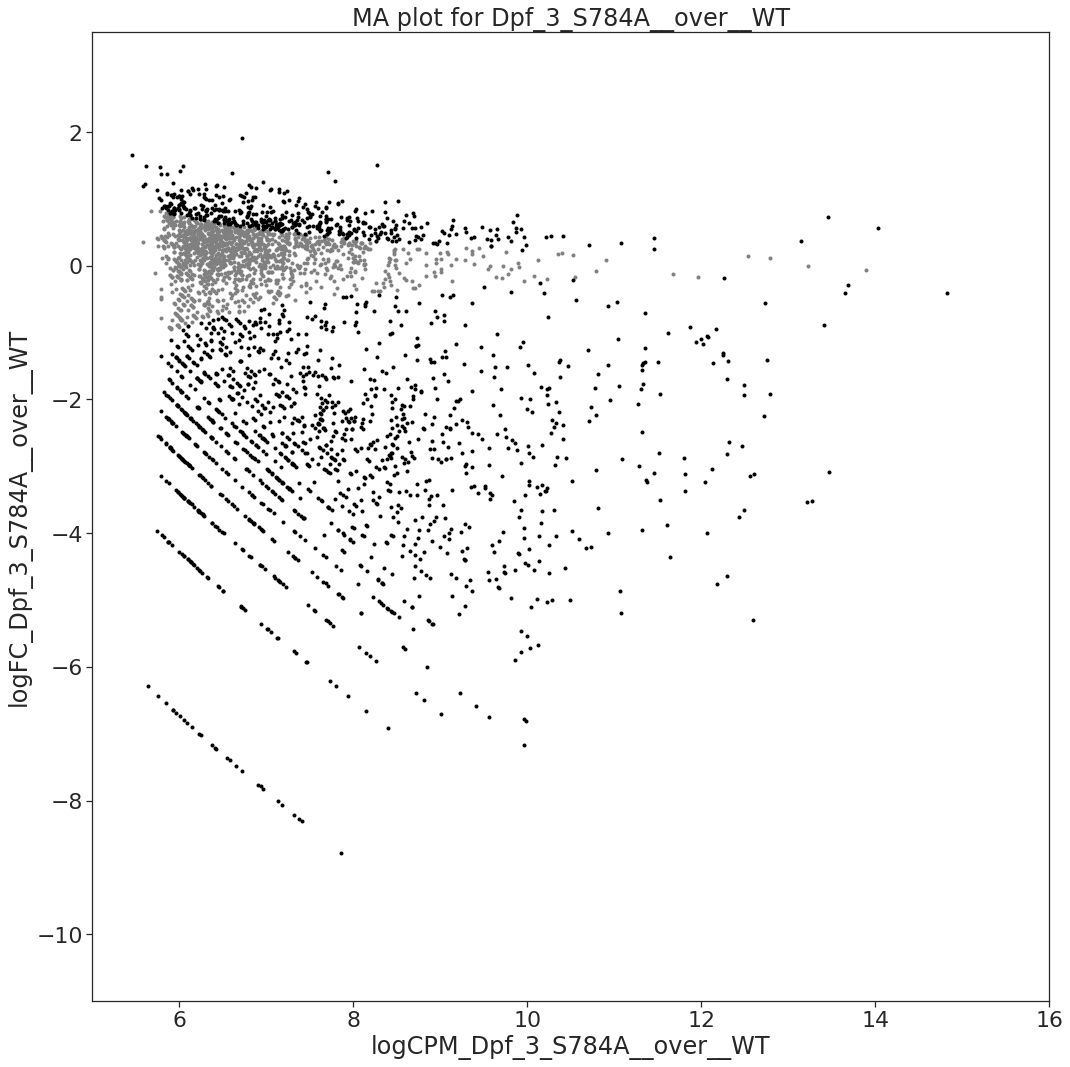

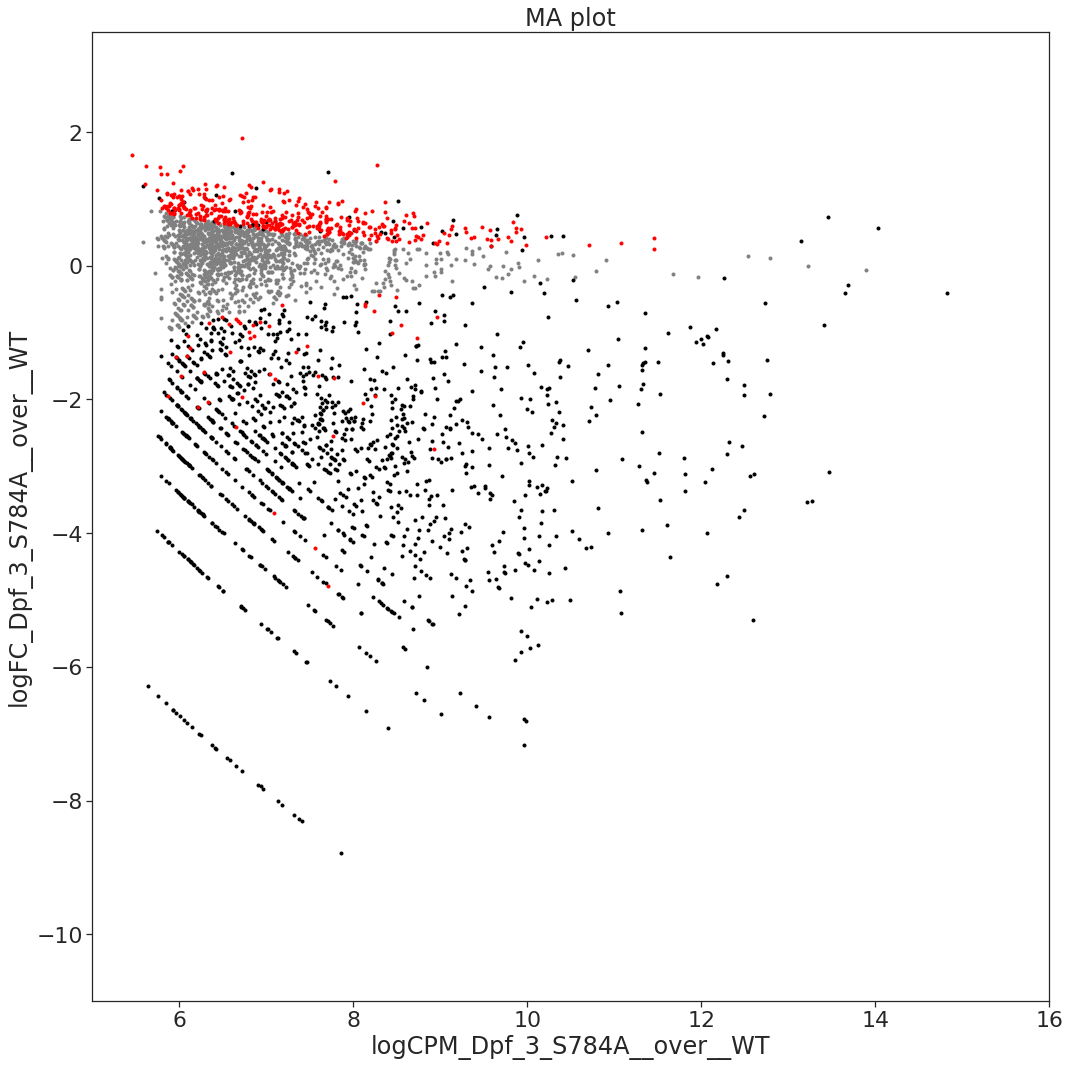

In [24]:
df_1_path = ip__HW3115_csr_1_input__HW3115_csr_1_IP_path
df_1_name = ip__HW3115_csr_1_input__HW3115_csr_1_IP_name

df_2_path = small_rna__WT__Dpf_3_S784A_path
df_2_name = small_rna__WT__Dpf_3_S784A_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

# Small RNAs in mut-2

## Small RNAs mut-2 – WAGO-1 over Input

Significant details:
                                                                                                                                   Significant
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_mut_2__over__WT<0)  1448       
No                                                                                                                                 962        
FDR_mut_2__over__WT<0.05                                                                                                           796        
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_mut_2__over__WT>0)  21         


Significant:
                                                                                                          Significant
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0)  1469       
No           

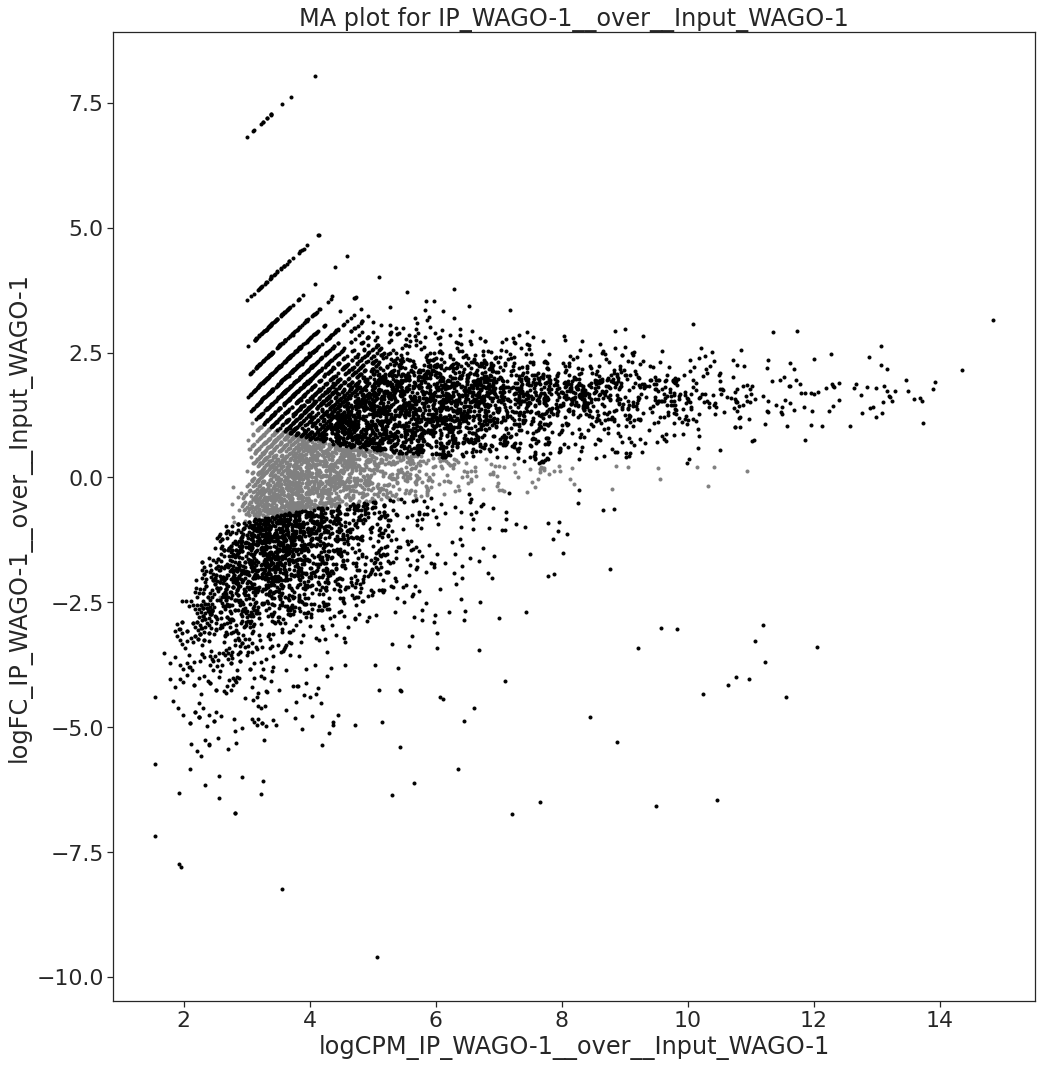

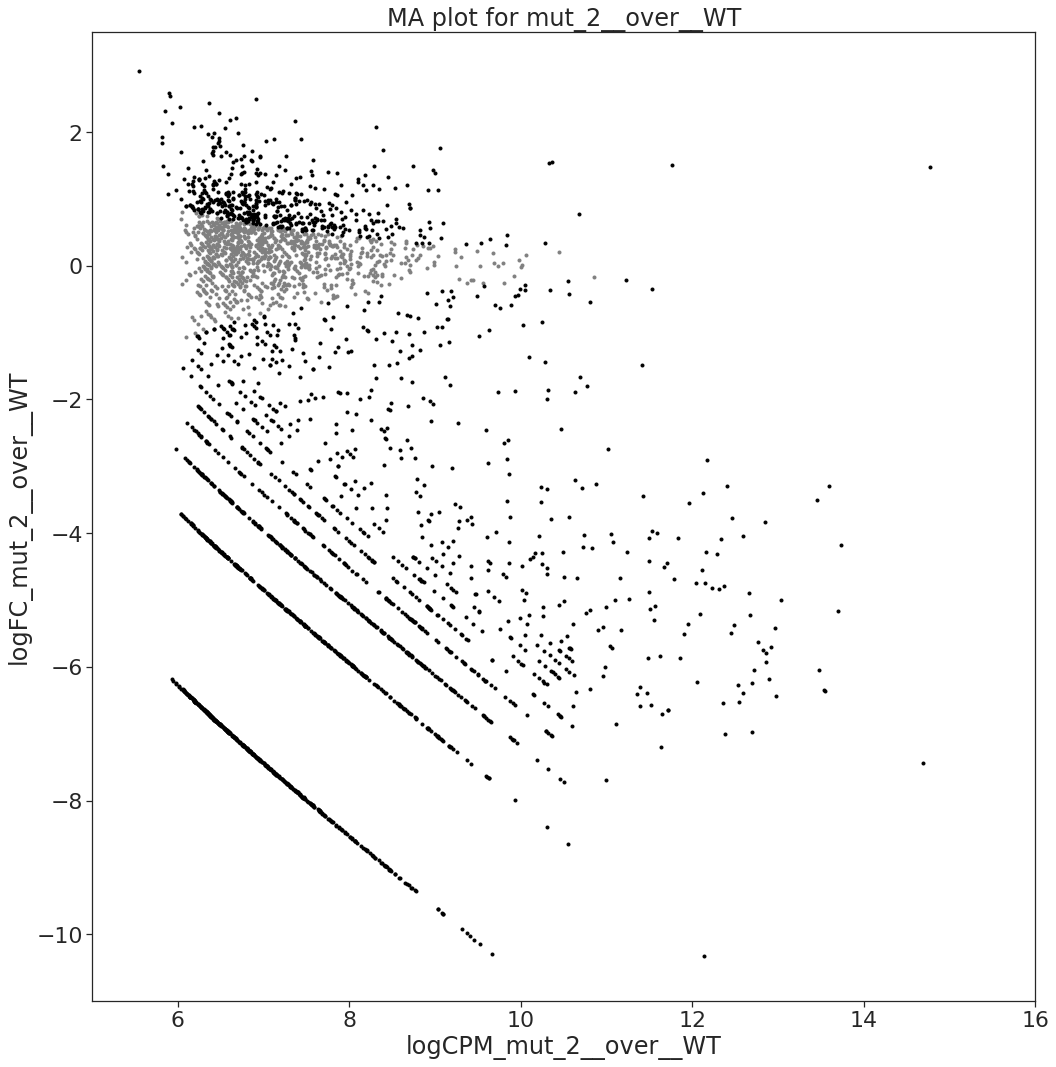

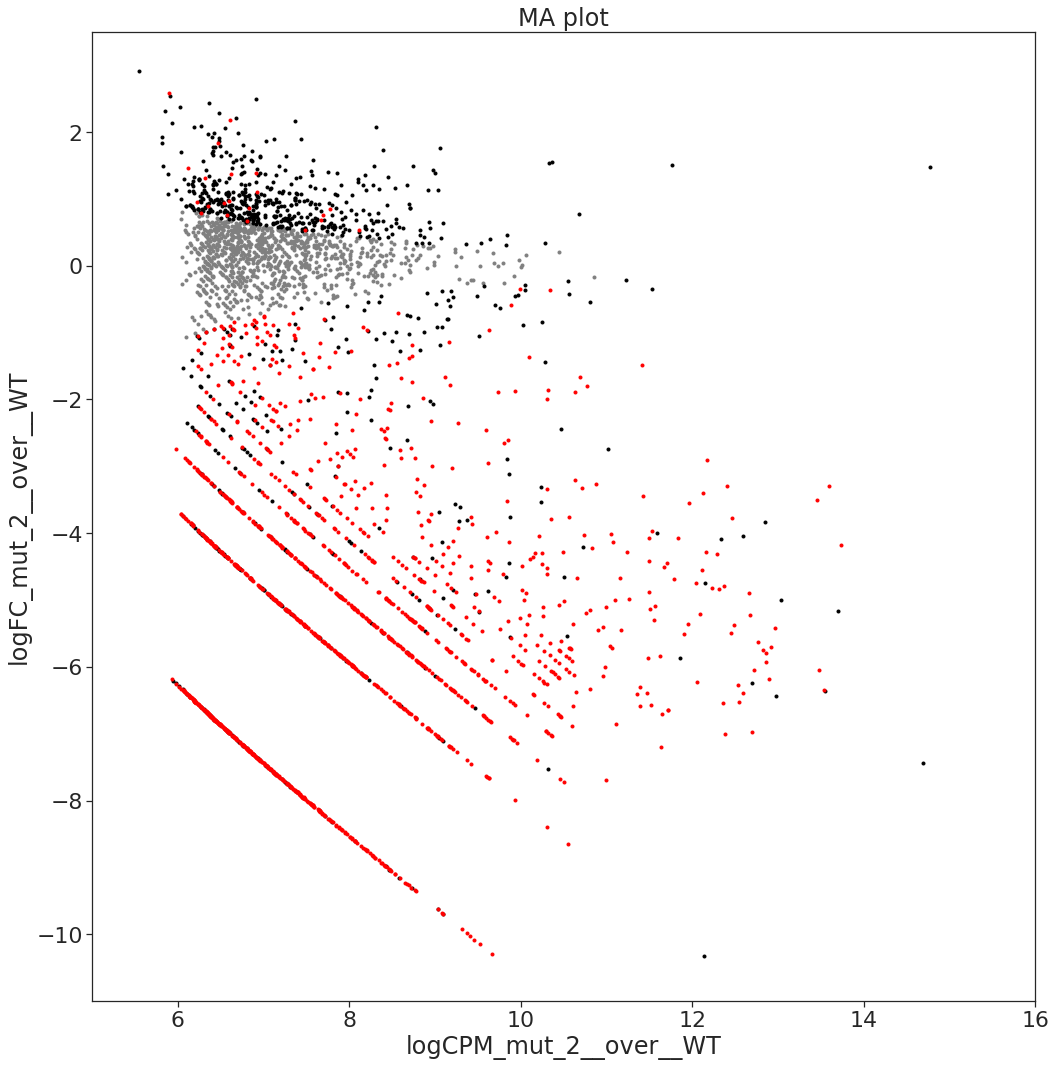

In [25]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = small_rna__WT__mut_2_path
df_2_name = small_rna__WT__mut_2_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs in mut-2 – WAGO-3 IP over Input

Significant details:
                                                                                                                                   Significant
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_mut_2__over__WT<0)  1469       
No                                                                                                                                 962        
FDR_mut_2__over__WT<0.05                                                                                                           769        
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_mut_2__over__WT>0)  27         


Significant:
                                                                                                          Significant
FDR_mut_2__over__WT<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0)  1496       
No           

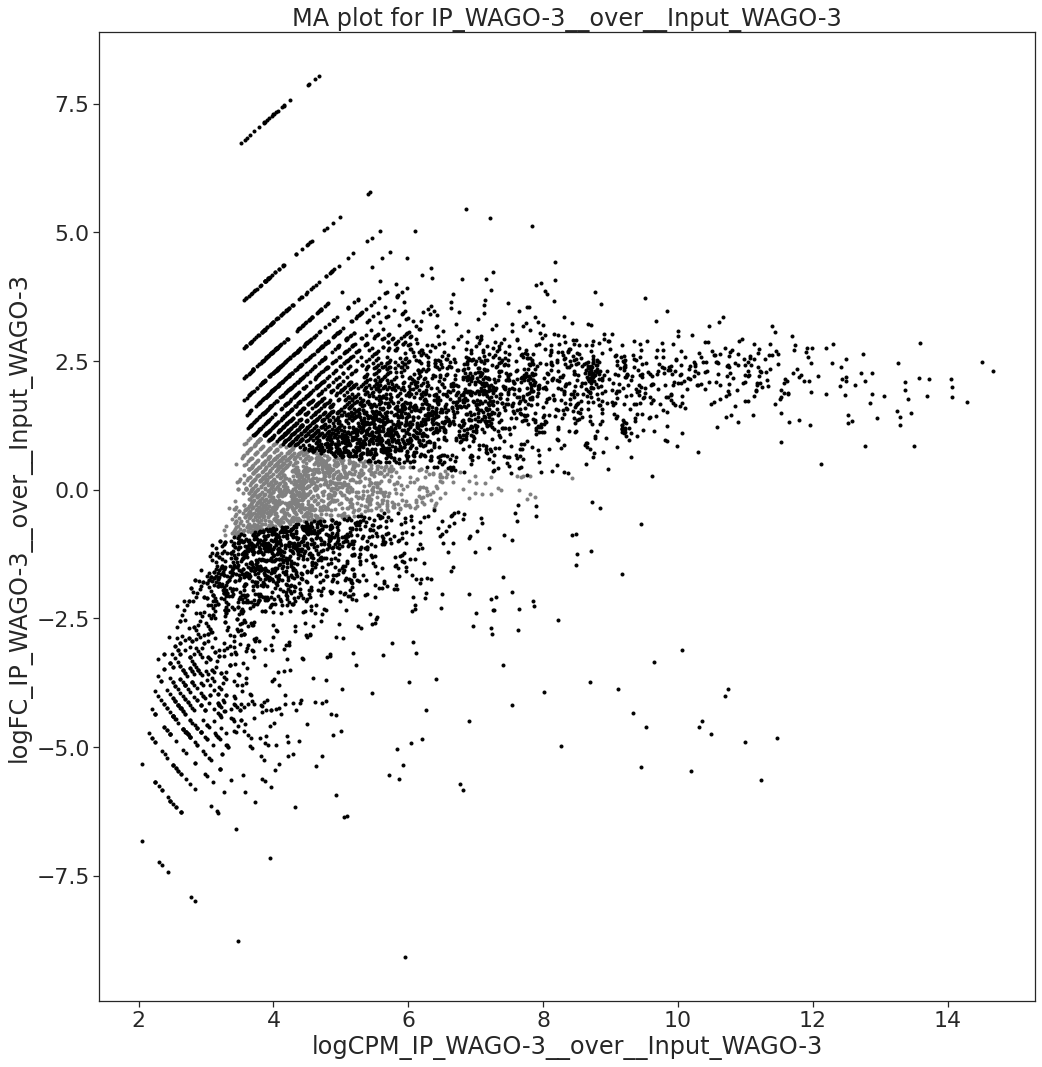

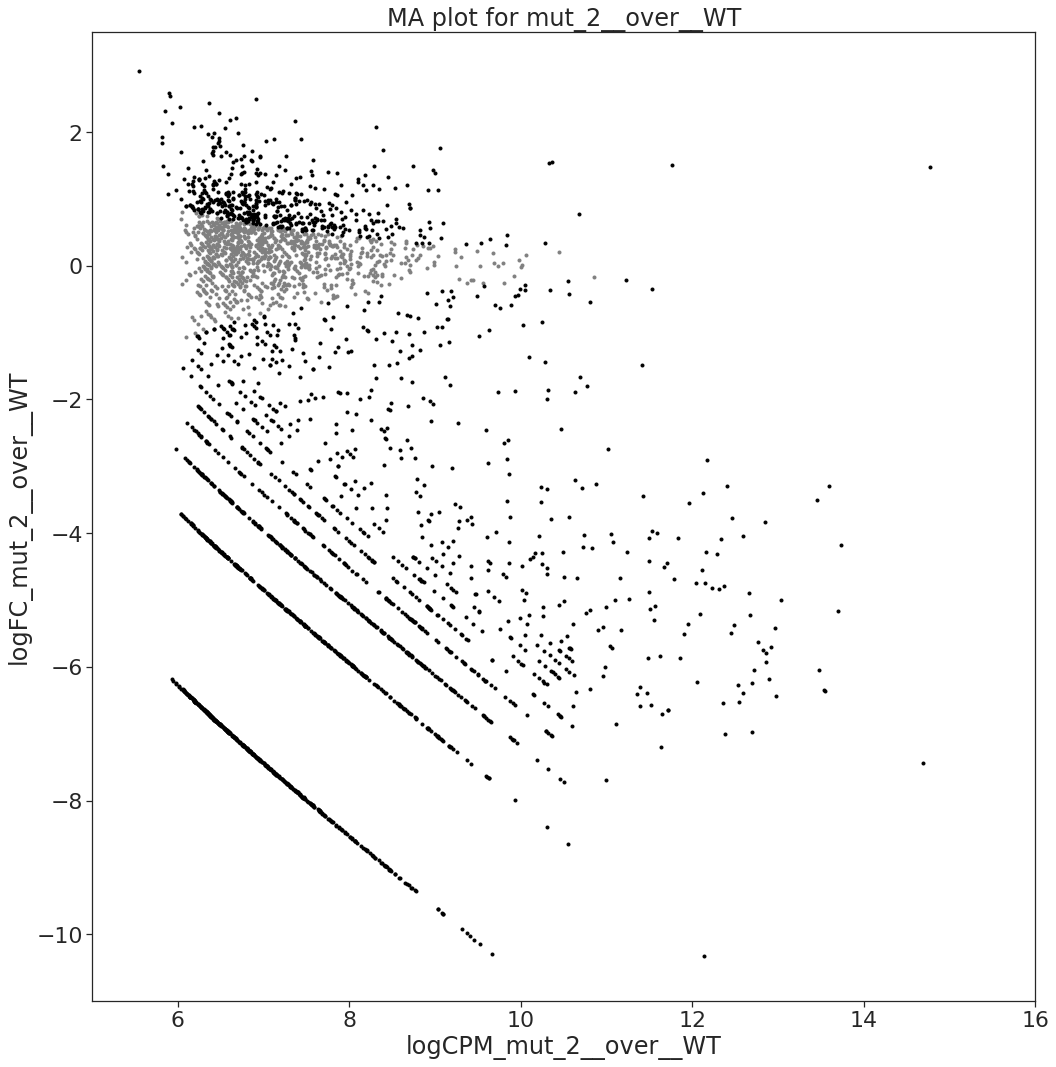

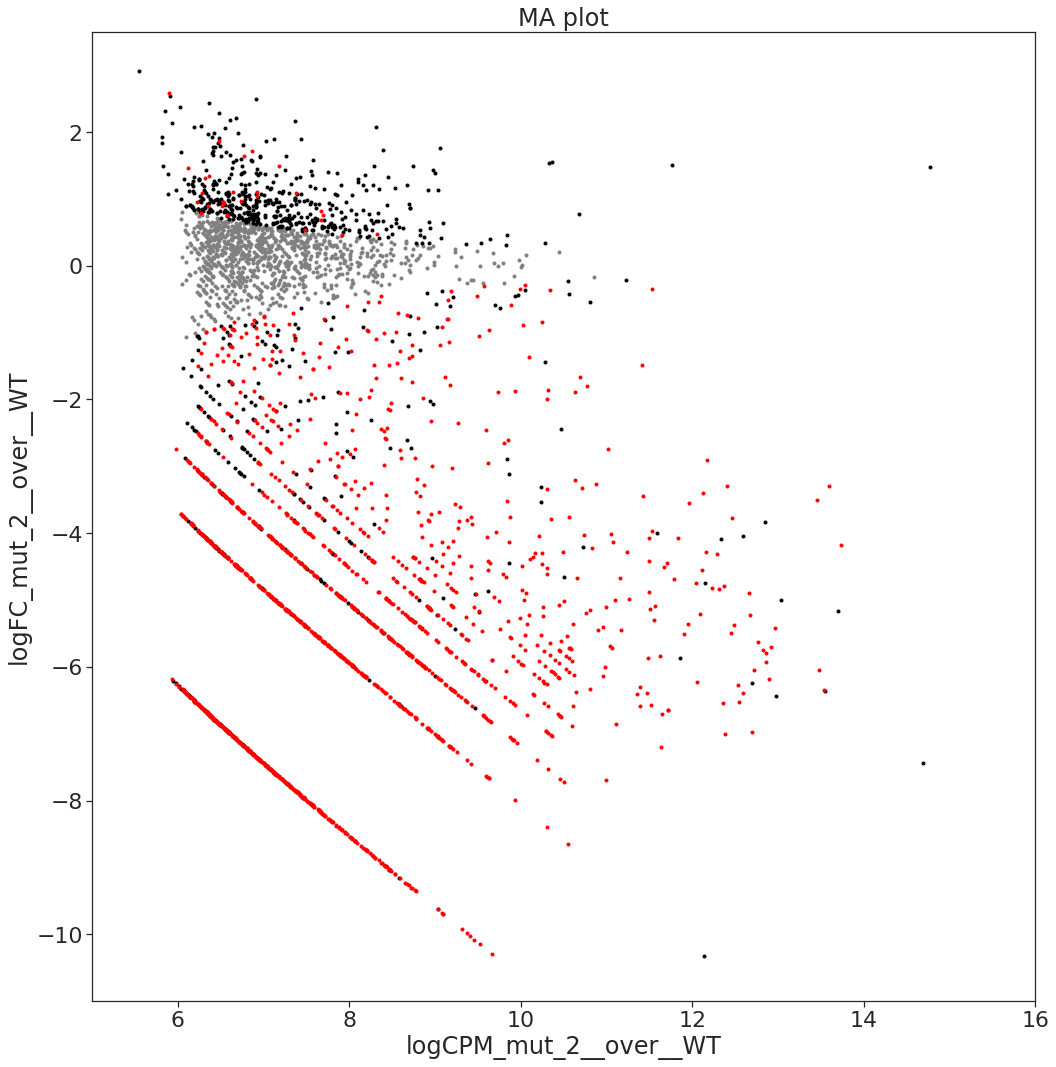

In [26]:
df_1_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_1_name = ip__Input_WAGO_3__IP_WAGO_3_name

df_2_path = small_rna__WT__mut_2_path
df_2_name = small_rna__WT__mut_2_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs mut-2 – csr-1 over Input

Significant details:
                                                                                                                                                           Significant
FDR_mut_2__over__WT<0.05                                                                                                                                   1633       
No                                                                                                                                                         962        
FDR_mut_2__over__WT<0.05\nFDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0.05\nlogFC_IP_HW3115_csr-1__over__HW3115_csr-1_input>0\nlogFC_mut_2__over__WT>0)  467        
FDR_mut_2__over__WT<0.05\nFDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0.05\nlogFC_IP_HW3115_csr-1__over__HW3115_csr-1_input>0\nlogFC_mut_2__over__WT<0)  165        


Significant:
                                                                                                                                 

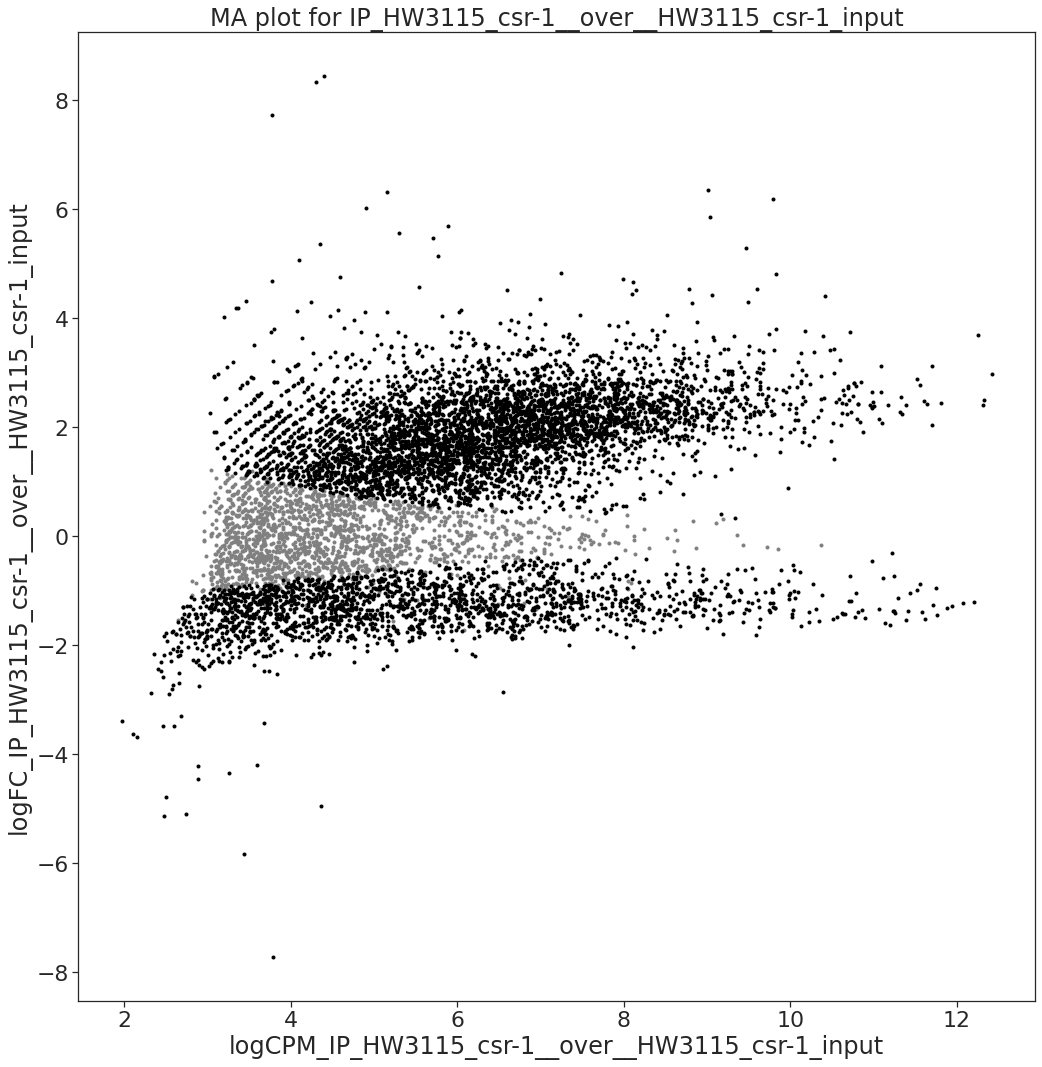

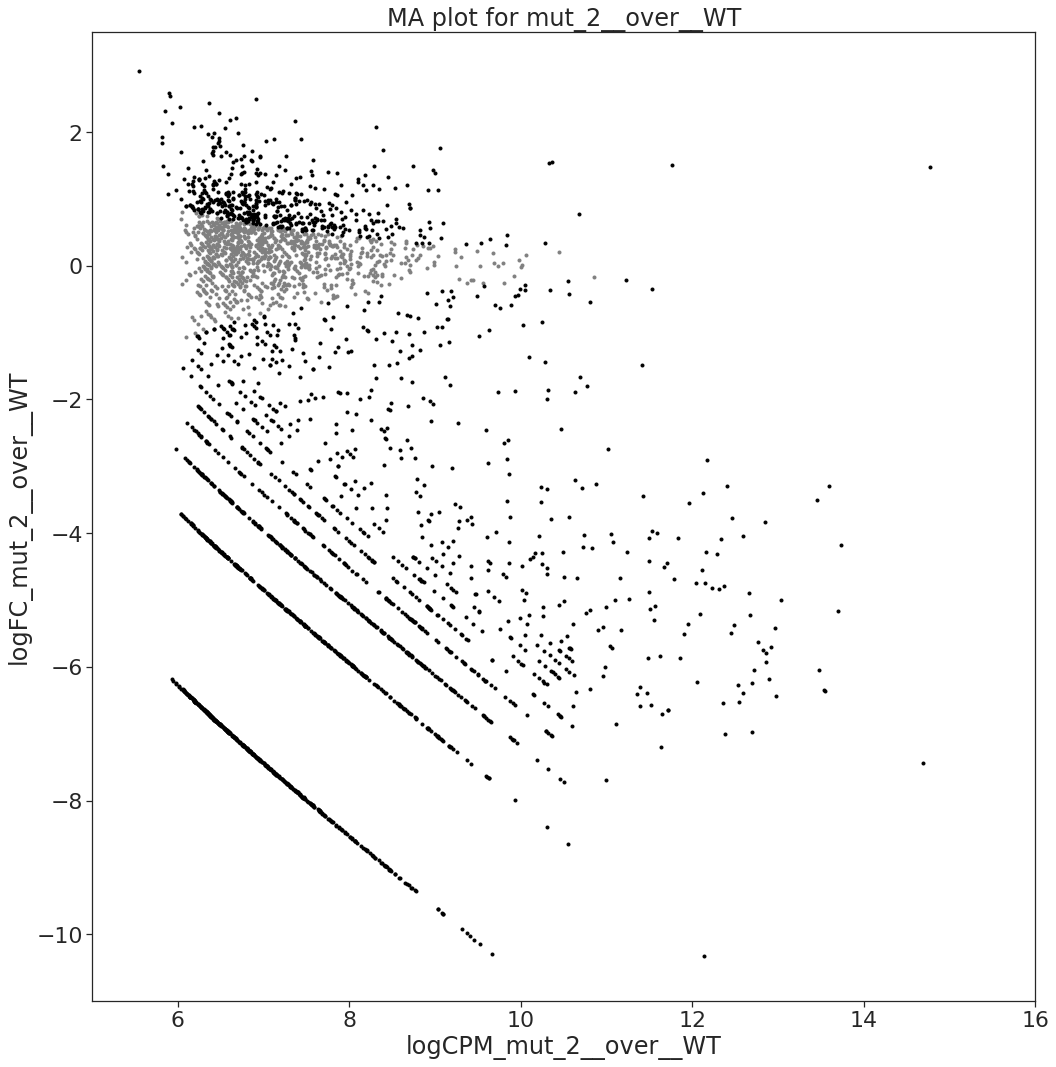

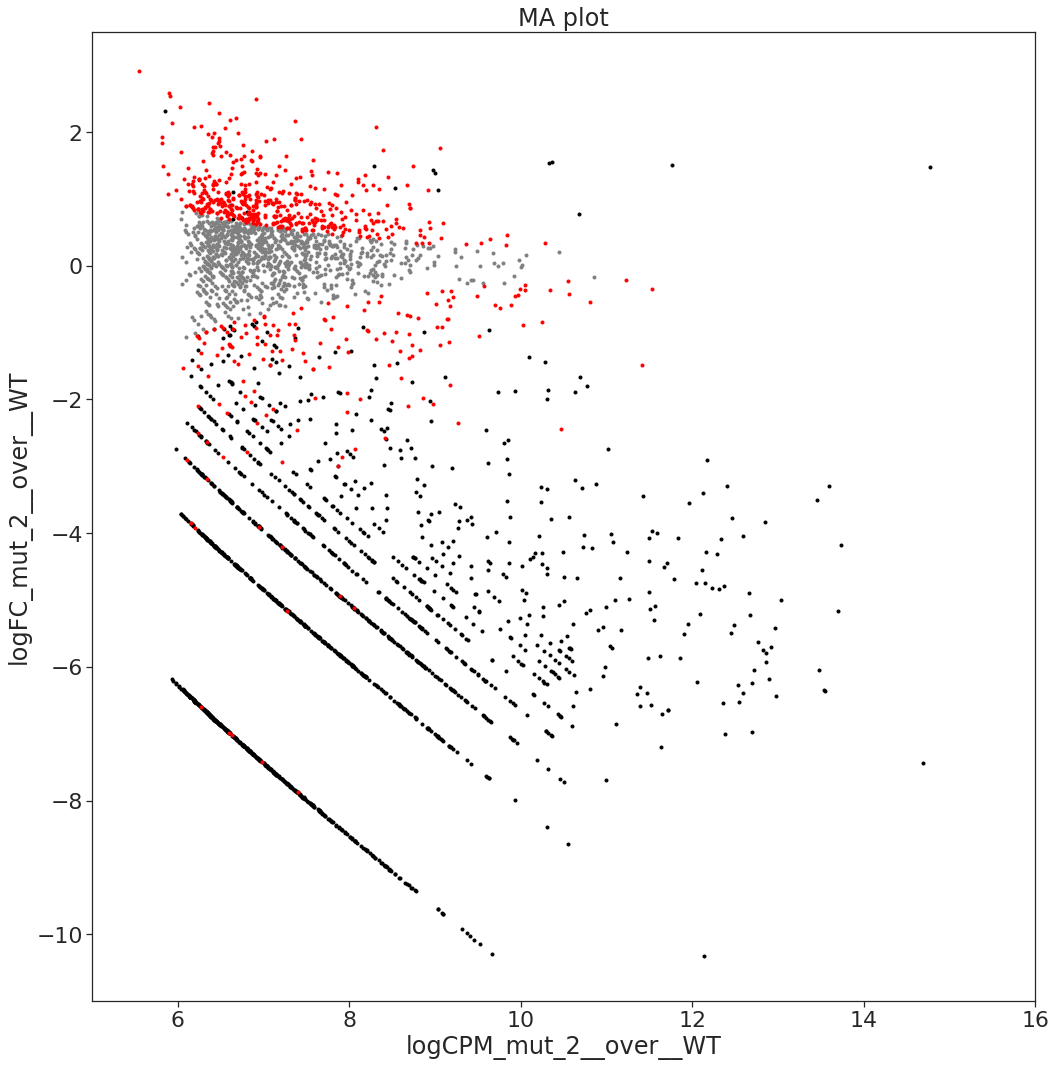

In [27]:
df_1_path = ip__HW3115_csr_1_input__HW3115_csr_1_IP_path
df_1_name = ip__HW3115_csr_1_input__HW3115_csr_1_IP_name

df_2_path = small_rna__WT__mut_2_path
df_2_name = small_rna__WT__mut_2_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs 3134 over WAGO-1 Input – csr-1 IP over Input

Significant details:
                                                                                                                                                                                             Significant
No                                                                                                                                                                                           3341       
FDR_HW3134_INPUT__over__WAGO-1_Input<0.05                                                                                                                                                    1709       
FDR_HW3134_INPUT__over__WAGO-1_Input<0.05\nFDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0.05\nlogFC_IP_HW3115_csr-1__over__HW3115_csr-1_input>0\nlogFC_HW3134_INPUT__over__WAGO-1_Input>0)  670        
FDR_HW3134_INPUT__over__WAGO-1_Input<0.05\nFDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0.05\nlogFC_IP_HW3115_csr-1__over__HW3115_csr-1_input>0\nlogFC_HW3134_INPUT__over__WAG

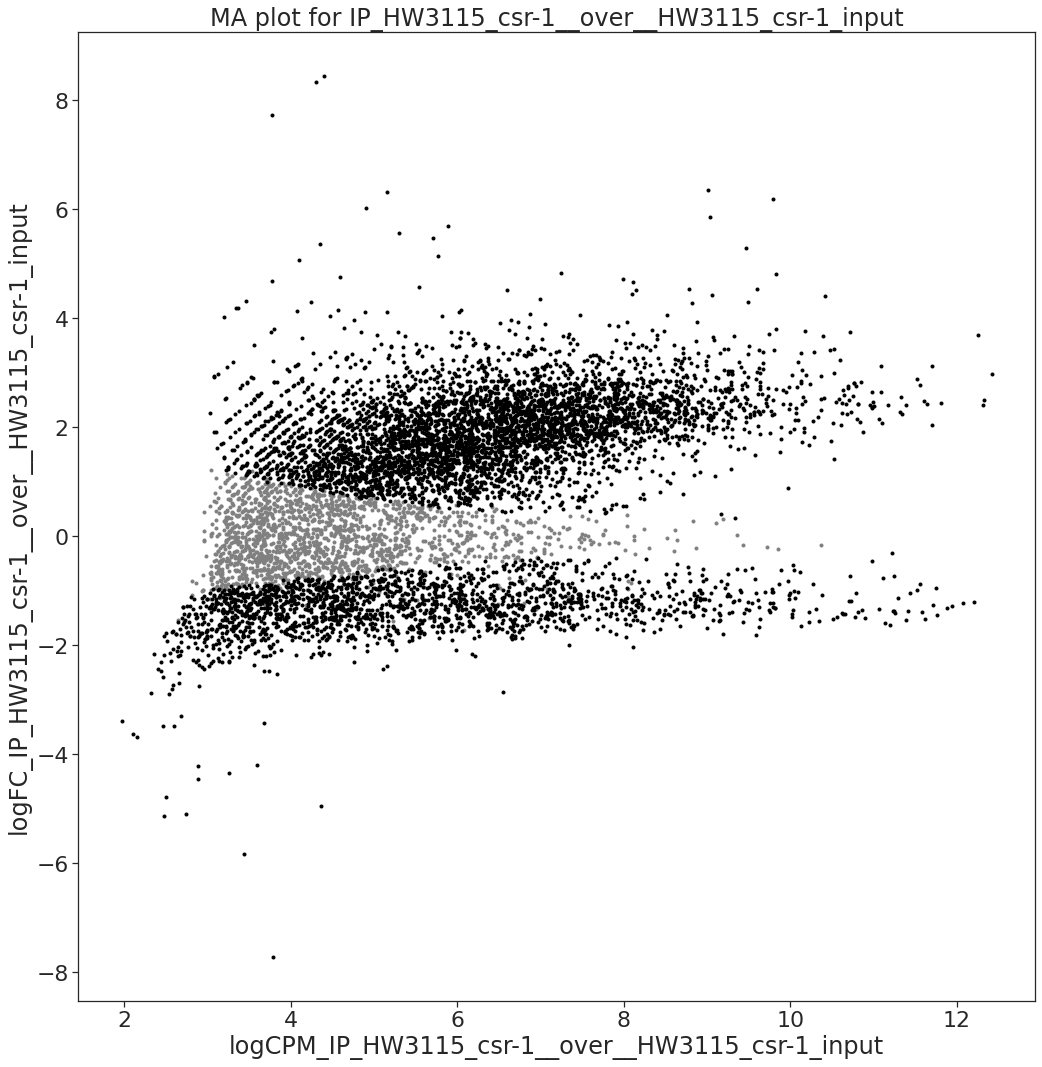

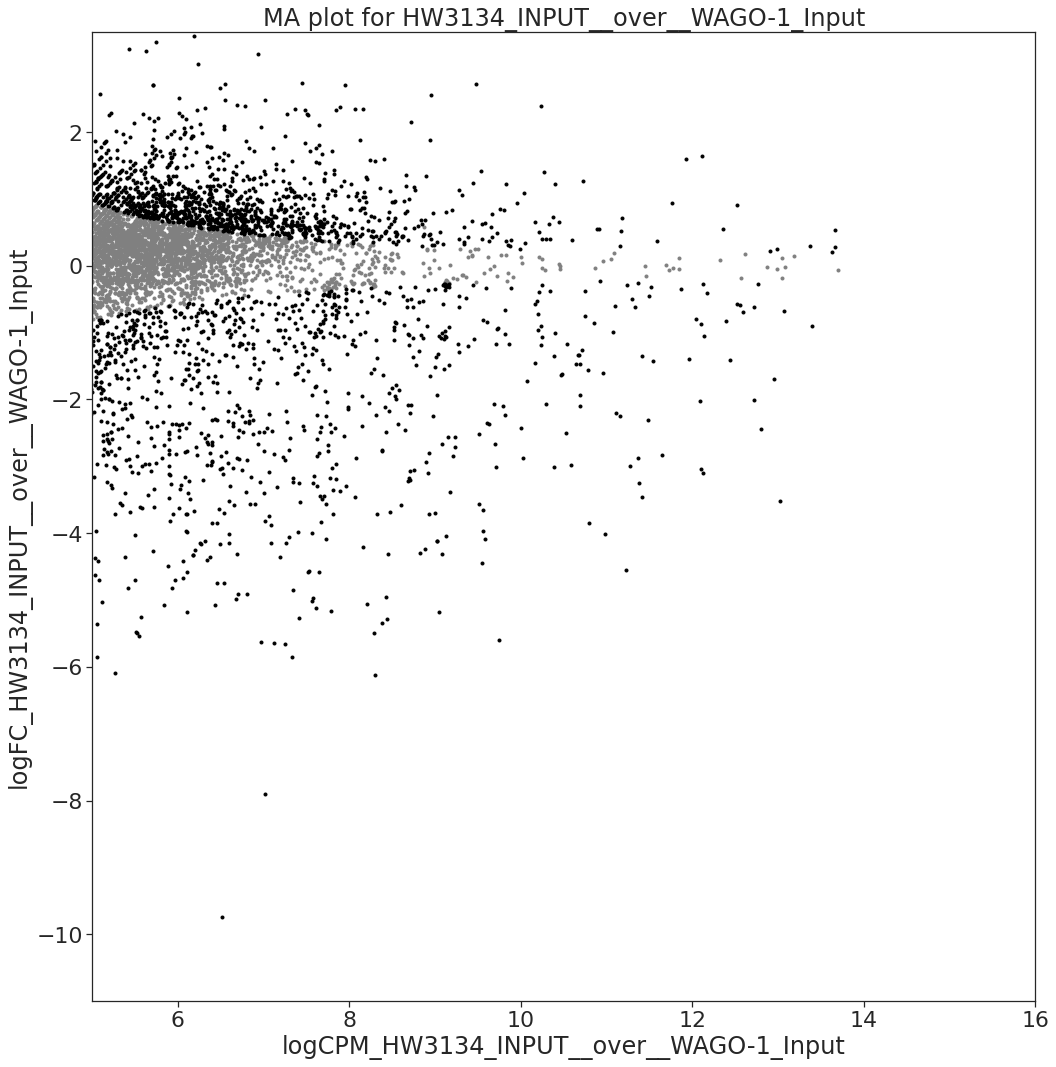

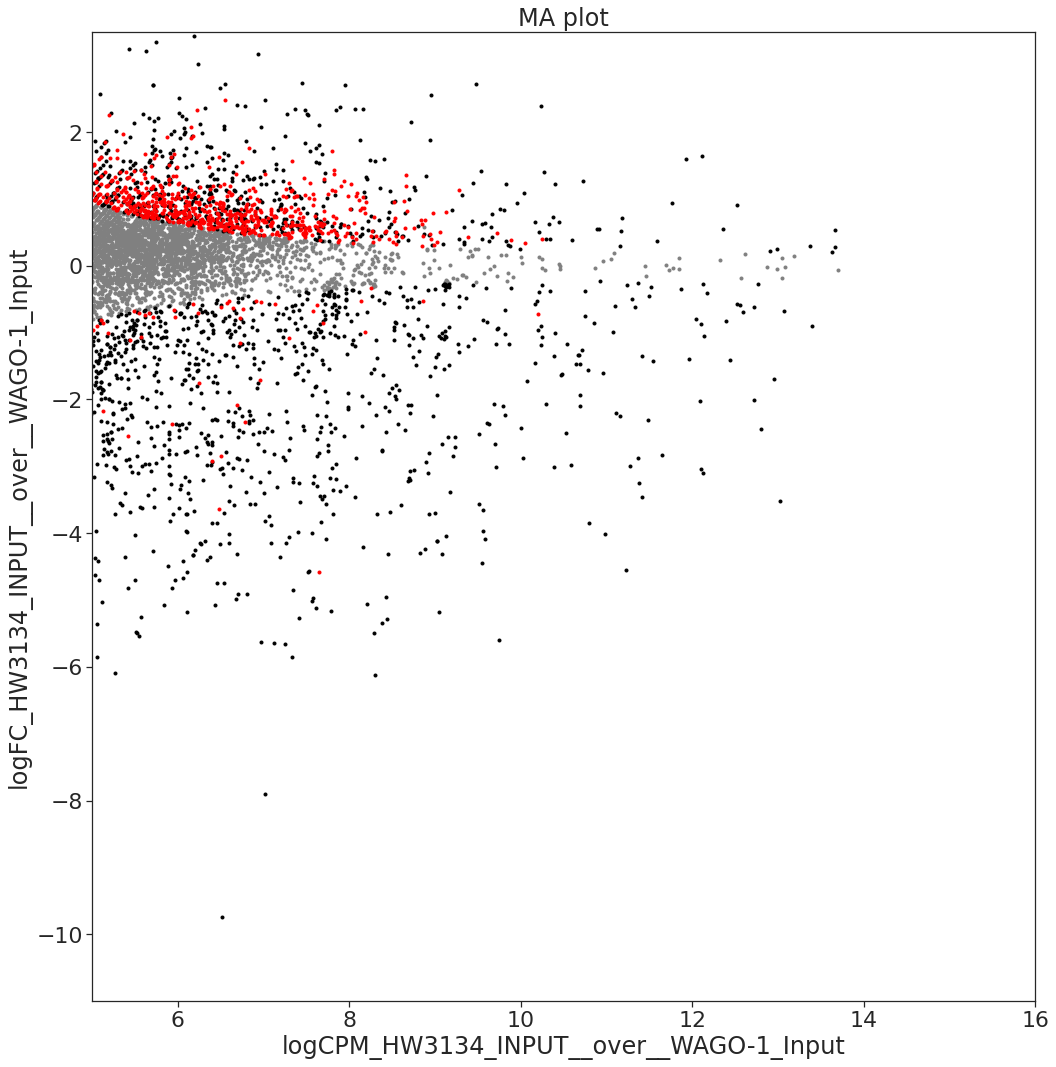

In [28]:
df_1_path = ip__HW3115_csr_1_input__HW3115_csr_1_IP_path
df_1_name = ip__HW3115_csr_1_input__HW3115_csr_1_IP_name

df_2_path = HW3134_INPUT__over__Input_WAGO_1_path
df_2_name = HW3134_INPUT__over__Input_WAGO_1_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

# Small RNAs in 3135 over WAGO-1 Input (3030)

## Small RNAs 3135 over WAGO-1 Input – WAGO-1 IP over Input

Significant details:
                                                                                                                                                                     Significant
No                                                                                                                                                                   2886       
FDR_HW3135_INPUT__over__WAGO-1_Input<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_HW3135_INPUT__over__WAGO-1_Input<0)  1229       
FDR_HW3135_INPUT__over__WAGO-1_Input<0.05                                                                                                                            1120       
FDR_HW3135_INPUT__over__WAGO-1_Input<0.05\nFDR_IP_WAGO-1__over__Input_WAGO-1<0.05\nlogFC_IP_WAGO-1__over__Input_WAGO-1>0\nlogFC_HW3135_INPUT__over__WAGO-1_Input>0)  400        


Significant:
                                                                               

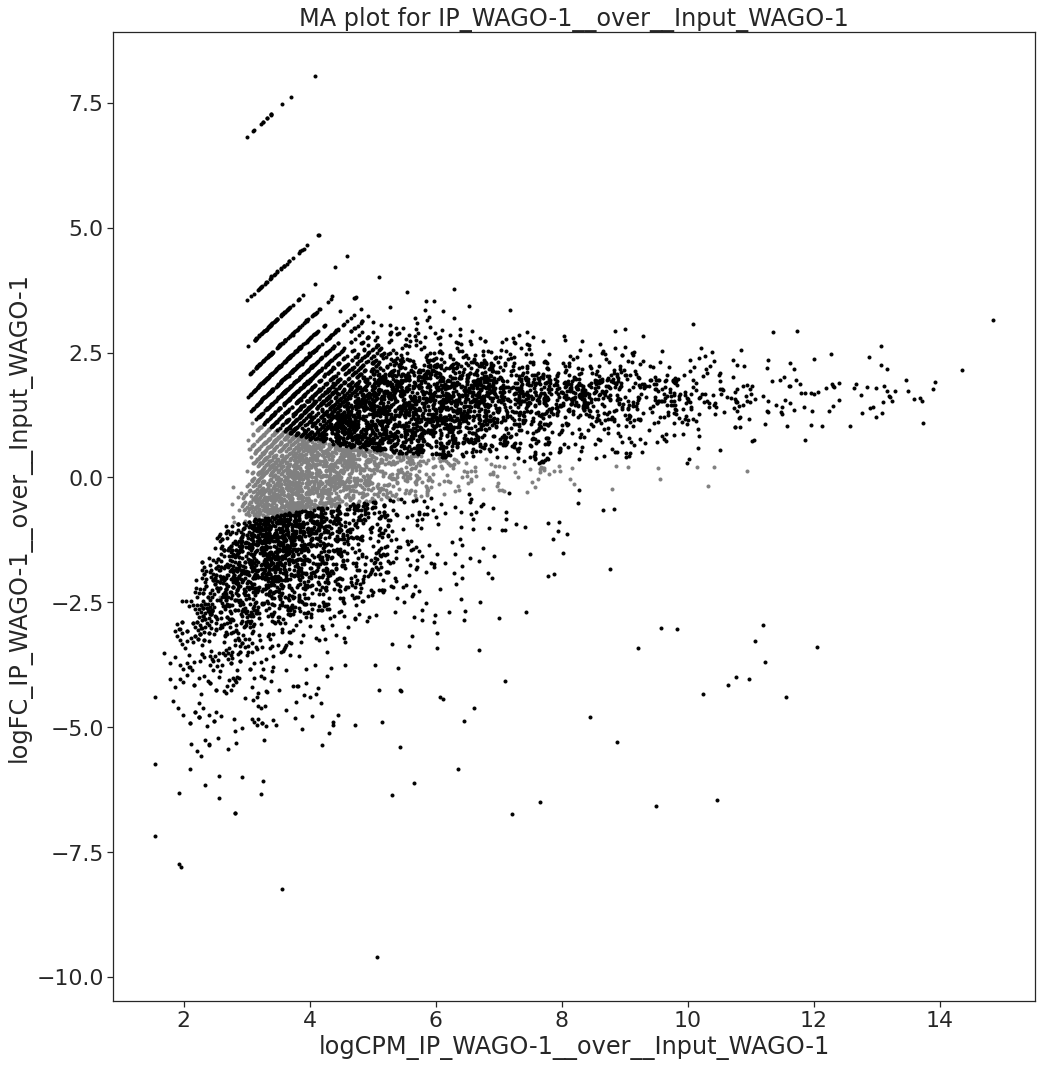

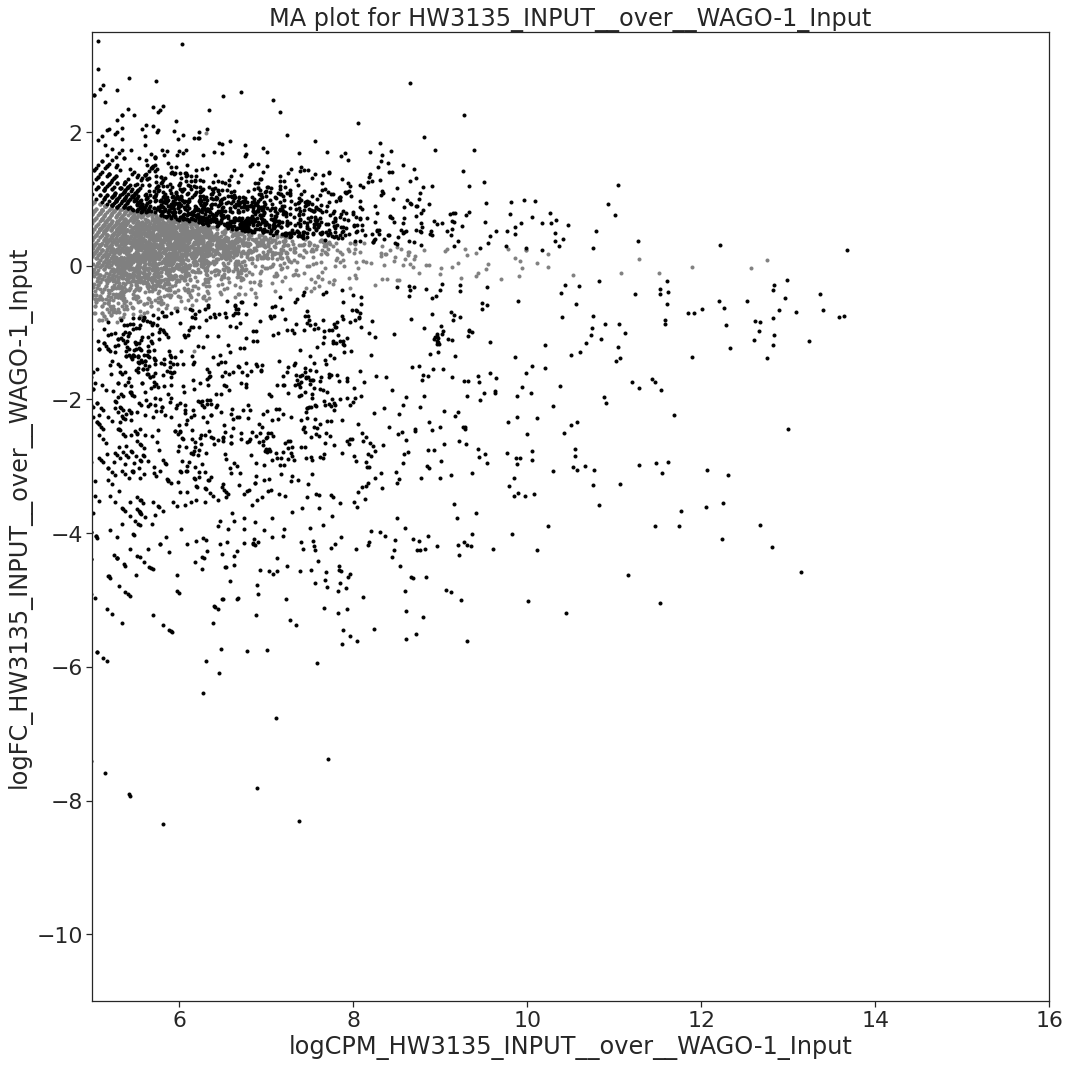

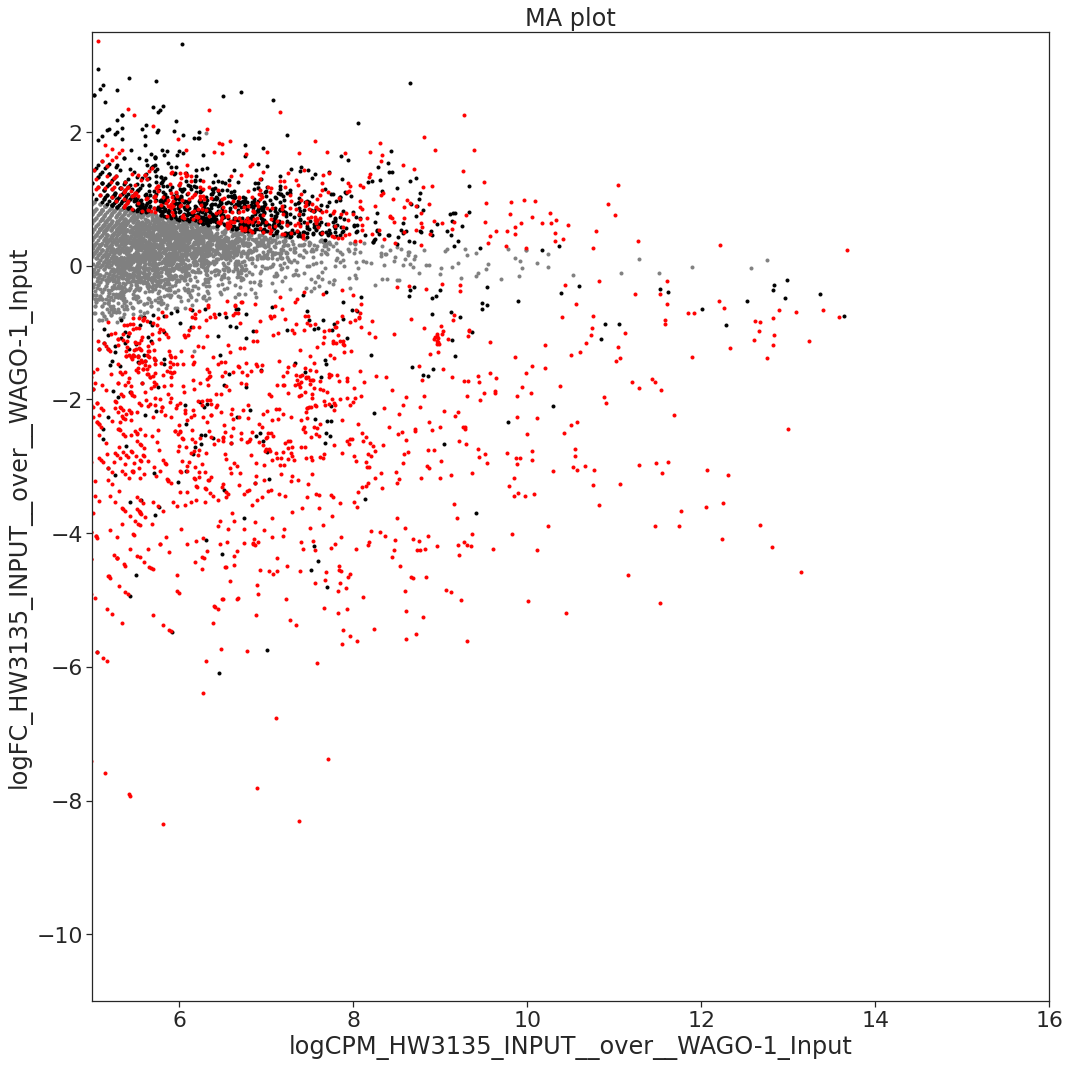

In [29]:
df_1_path = ip__Input_WAGO_1__IP_WAGO_1_path
df_1_name = ip__Input_WAGO_1__IP_WAGO_1_name

df_2_path = HW3135_INPUT__over__Input_WAGO_1_path
df_2_name = HW3135_INPUT__over__Input_WAGO_1_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs 3135 over WAGO-1 Input – WAGO-3 IP over Input

Significant details:
                                                                                                                                                                     Significant
No                                                                                                                                                                   2886       
FDR_HW3135_INPUT__over__WAGO-1_Input<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_HW3135_INPUT__over__WAGO-1_Input<0)  1239       
FDR_HW3135_INPUT__over__WAGO-1_Input<0.05                                                                                                                            1151       
FDR_HW3135_INPUT__over__WAGO-1_Input<0.05\nFDR_IP_WAGO-3__over__Input_WAGO-3<0.05\nlogFC_IP_WAGO-3__over__Input_WAGO-3>0\nlogFC_HW3135_INPUT__over__WAGO-1_Input>0)  359        


Significant:
                                                                               

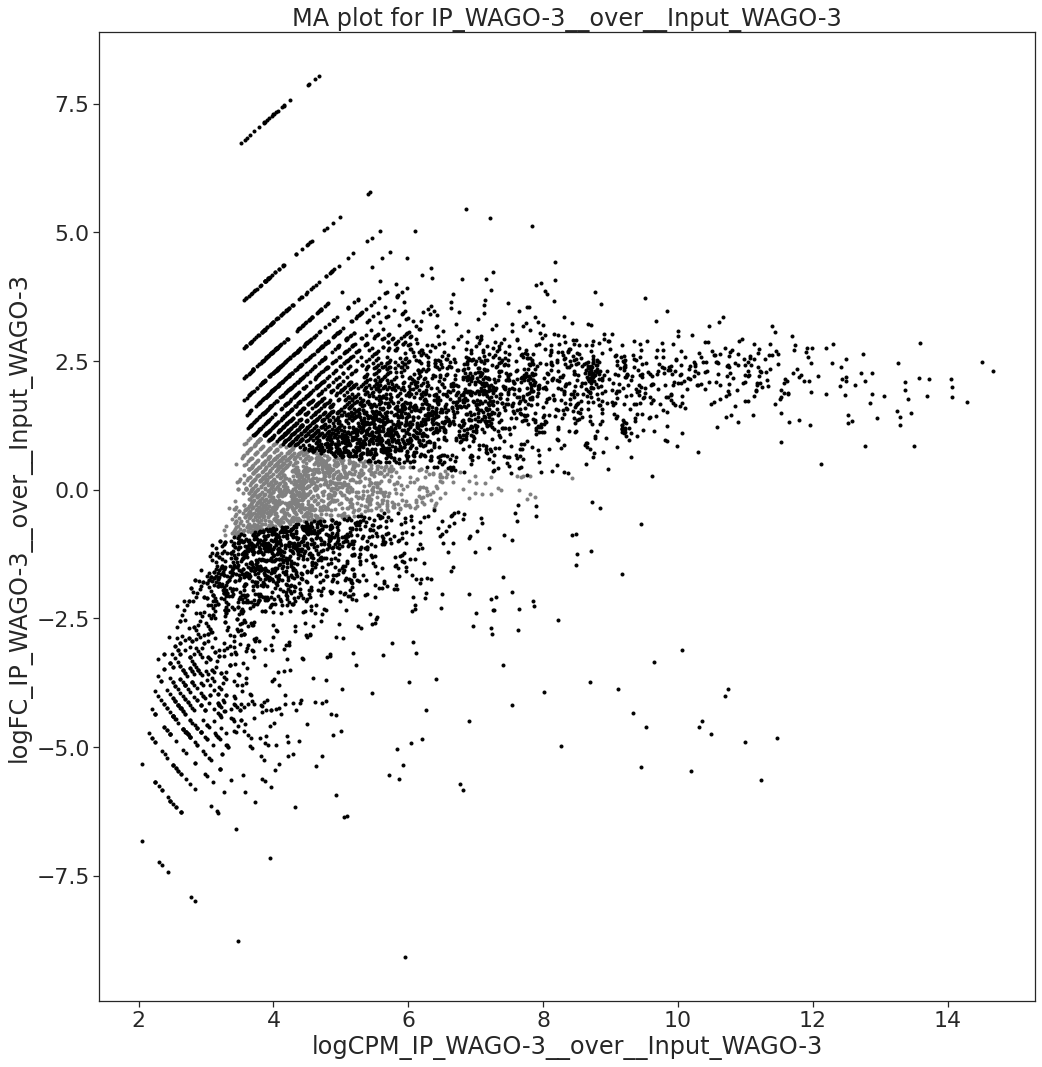

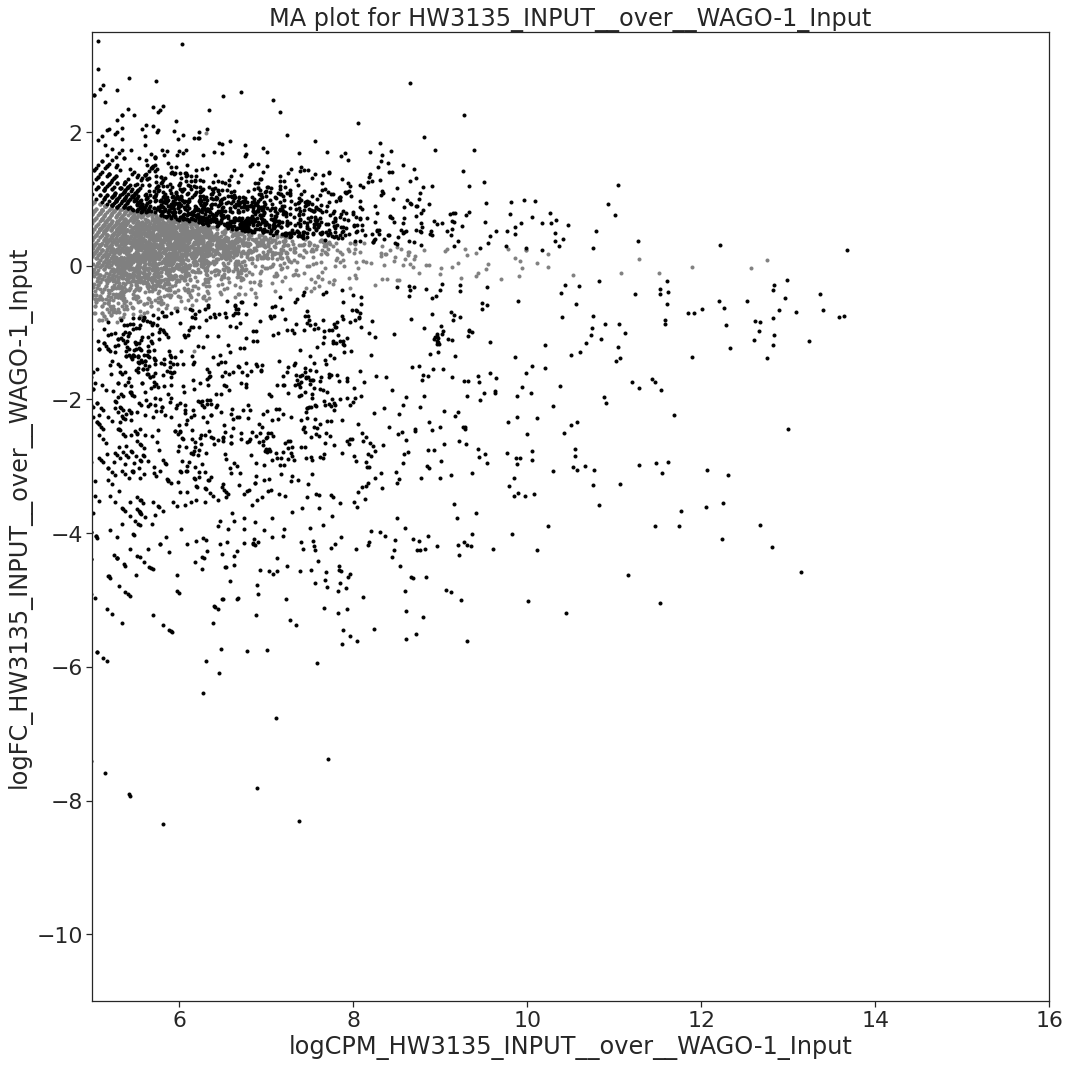

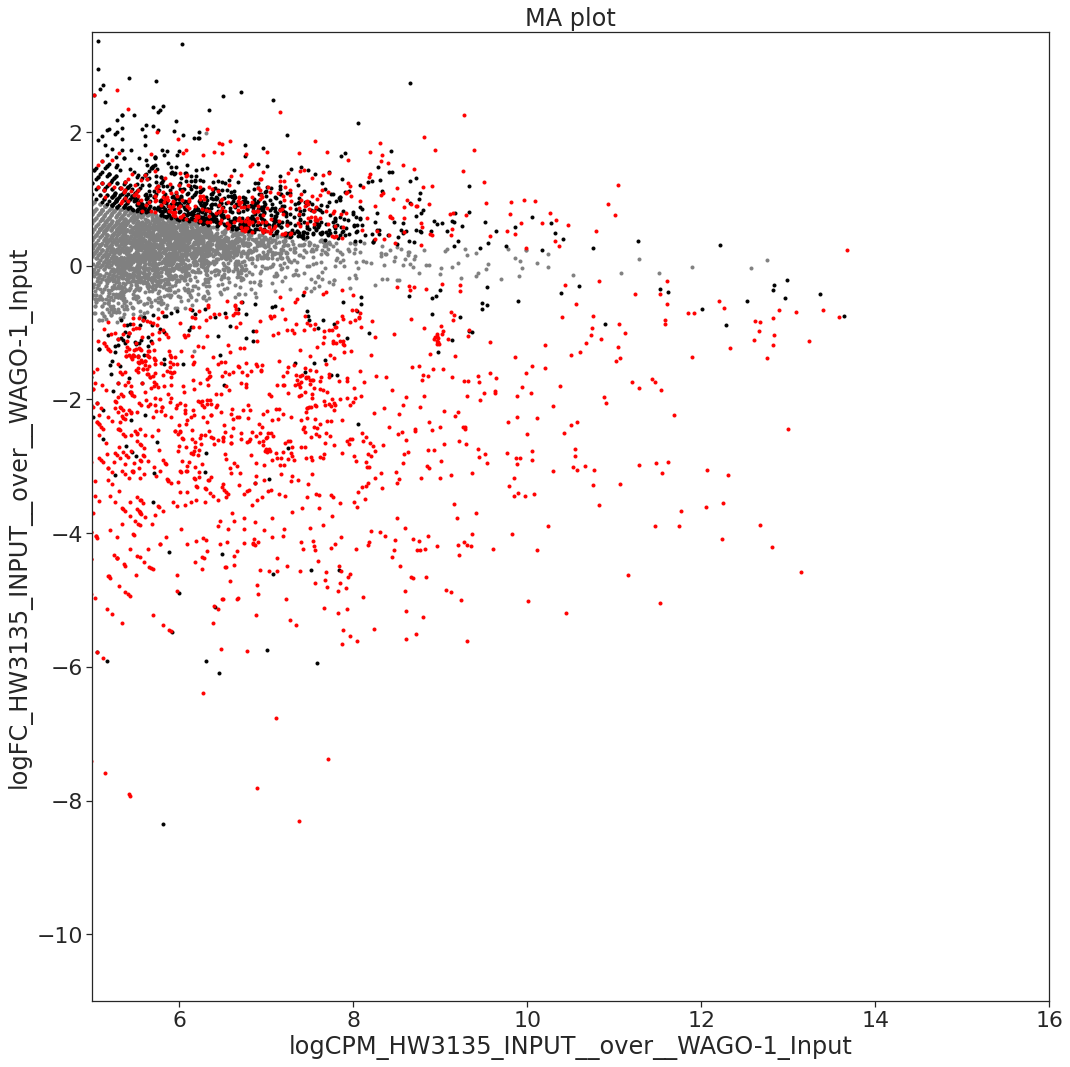

In [30]:
df_1_path = ip__Input_WAGO_3__IP_WAGO_3_path
df_1_name = ip__Input_WAGO_3__IP_WAGO_3_name

df_2_path = HW3135_INPUT__over__Input_WAGO_1_path
df_2_name = HW3135_INPUT__over__Input_WAGO_1_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

## Small RNAs 3135 over WAGO-1 Input – csr-1 IP over Input

Significant details:
                                                                                                                                                                                             Significant
No                                                                                                                                                                                           2886       
FDR_HW3135_INPUT__over__WAGO-1_Input<0.05                                                                                                                                                    1882       
FDR_HW3135_INPUT__over__WAGO-1_Input<0.05\nFDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0.05\nlogFC_IP_HW3115_csr-1__over__HW3115_csr-1_input>0\nlogFC_HW3135_INPUT__over__WAGO-1_Input>0)  825        
FDR_HW3135_INPUT__over__WAGO-1_Input<0.05\nFDR_IP_HW3115_csr-1__over__HW3115_csr-1_input<0.05\nlogFC_IP_HW3115_csr-1__over__HW3115_csr-1_input>0\nlogFC_HW3135_INPUT__over__WAG

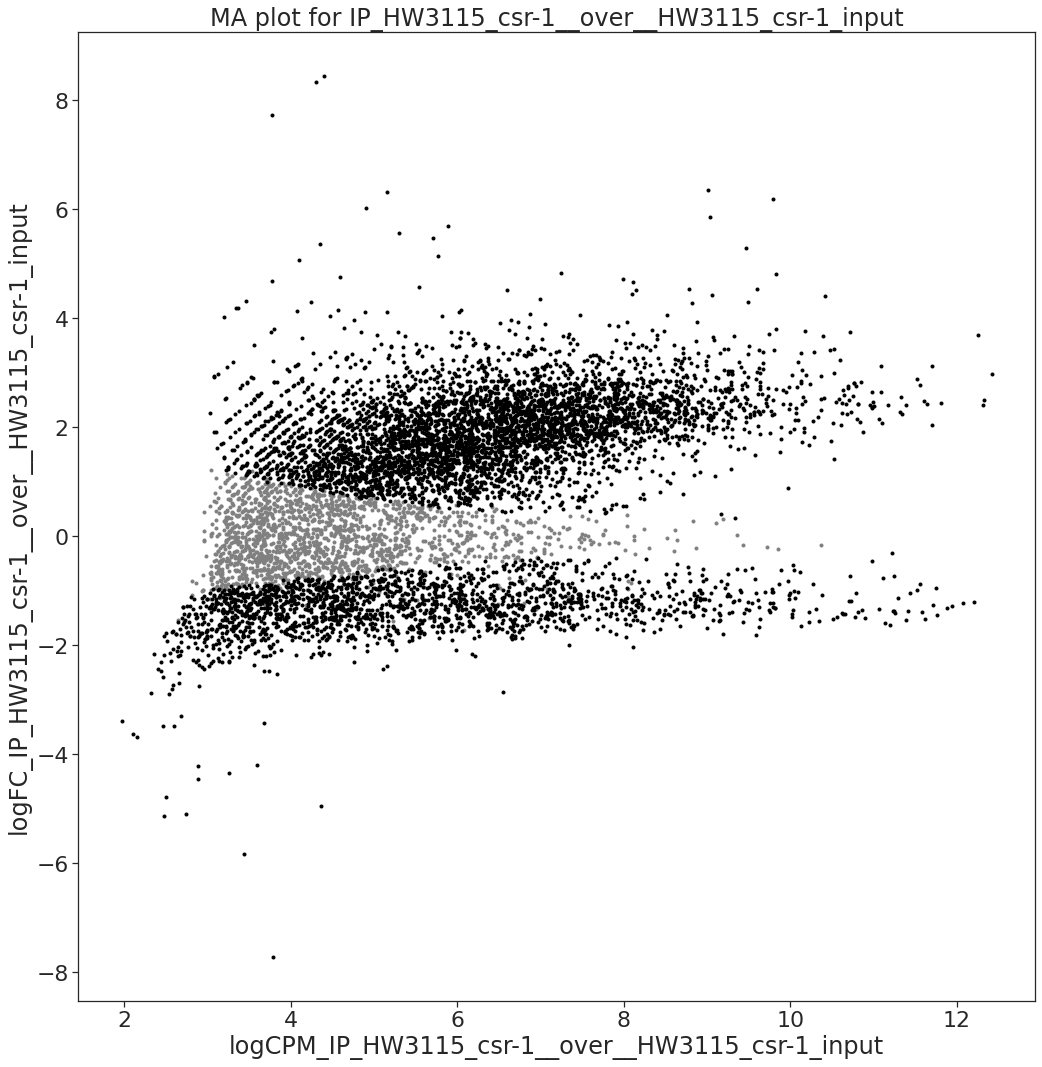

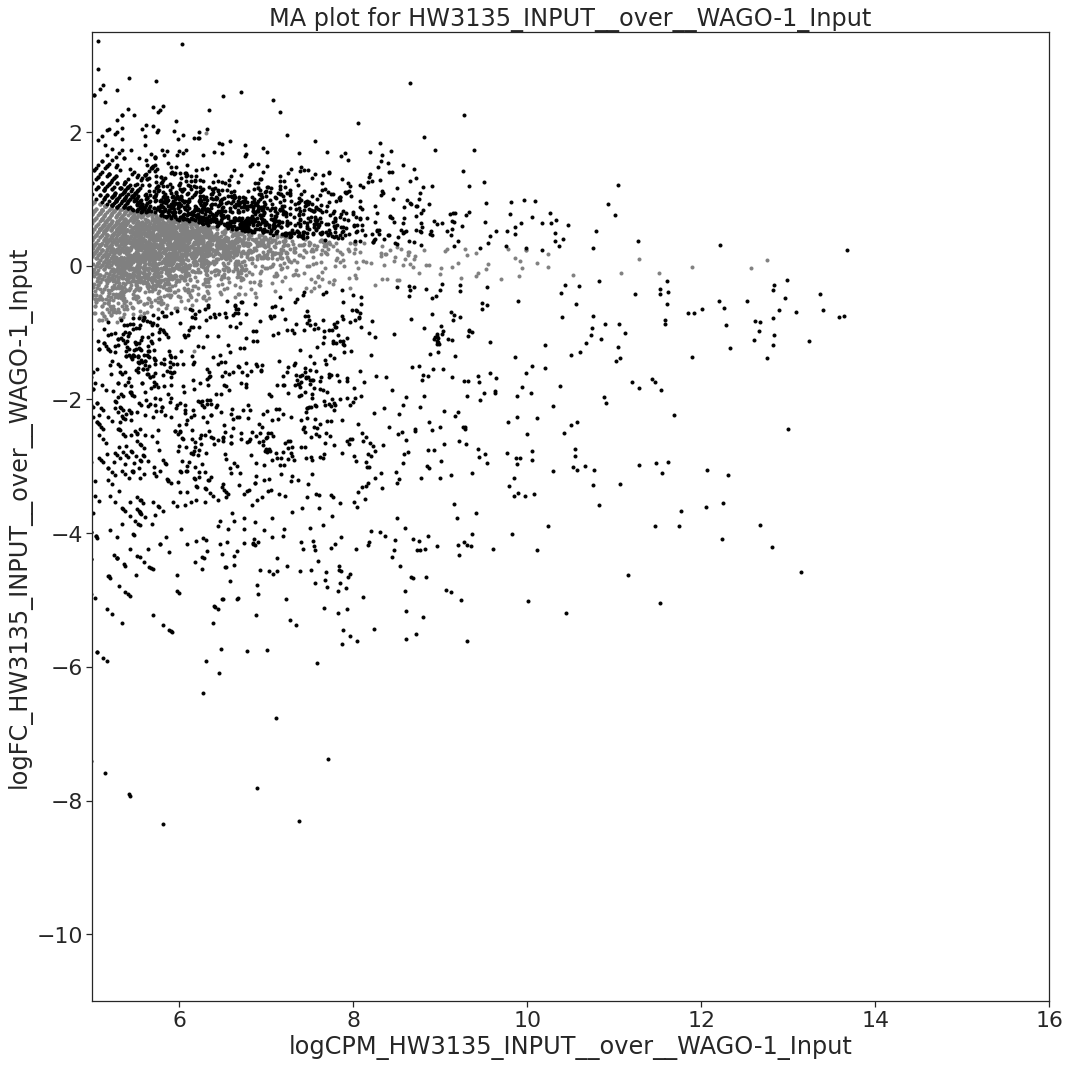

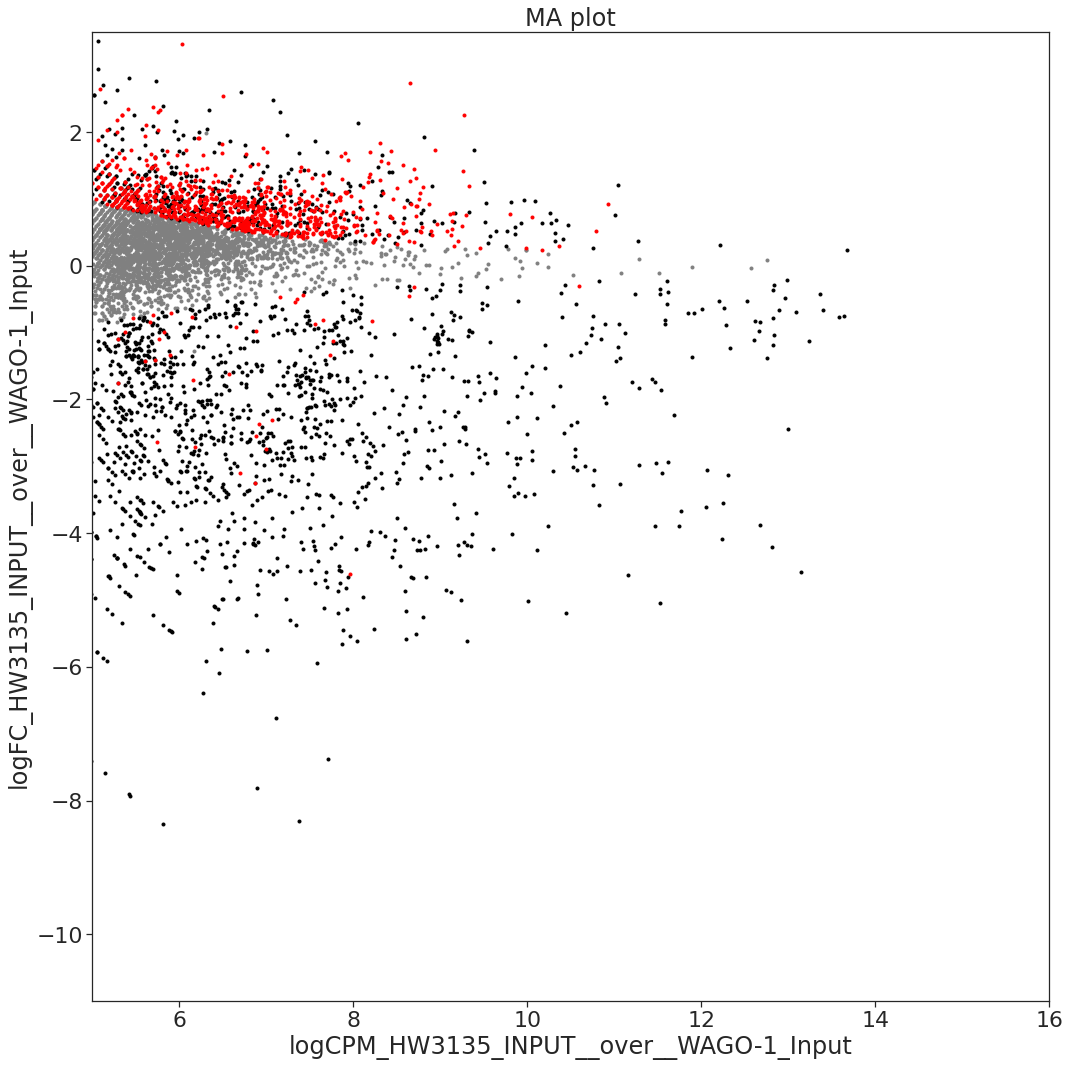

In [31]:
df_1_path = ip__HW3115_csr_1_input__HW3115_csr_1_IP_path
df_1_name = ip__HW3115_csr_1_input__HW3115_csr_1_IP_name

df_2_path = HW3135_INPUT__over__Input_WAGO_1_path
df_2_name = HW3135_INPUT__over__Input_WAGO_1_name

plot_merged_MA_plot(df_1_path, df_2_path, df_1_name, df_2_name)

# Small RNAs dpf-3 null - Mark Transposons/genes

In [32]:
df_path = small_rna__WT__Dpf_3_null_path
df_name = small_rna__WT__Dpf_3_null_name

In [33]:
df = prepare_df(df_path, df_name)

In [34]:
df.head()

id  logFC_Dpf_3_null__over__WT  \
0  I:10238747-10239295:+ -3.346020                     
1  I:10239328-10241663:+ -2.303303                     
2  I:10528240-10529850:- -3.611880                     
3  I:11063165-11063330:- -3.505321                     
4  I:11072235-11072438:- -2.372459                     

   logCPM_Dpf_3_null__over__WT  LR_Dpf_3_null__over__WT  \
0  6.197469                     62.593667                 
1  8.471311                     152.901155                
2  6.942803                     109.502288                
3  5.853918                     50.826569                 
4  5.219526                     19.895683                 

   PValue_Dpf_3_null__over__WT  FDR_Dpf_3_null__over__WT  \
0  2.540691e-15                 1.098730e-14               
1  4.026016e-35                 3.345934e-34               
2  1.259590e-25                 7.859444e-25               
3  1.008986e-12                 3.911563e-12               
4  8.178480e-06                 2.140453e-05               

   taxonomy_id_Dpf_3_null__over__WT gene_name_Dpf_3_null__over__WT  \
0 NaN                                NaN                             
1 NaN                                NaN                             
2 NaN                                NaN                             
3 NaN                                NaN                             
4 NaN                                NaN                             

  sequence_Dpf_3_null__over__WT status_Dpf_3_null__over__WT  \
0  NaN                           NaN                          
1  NaN                           NaN                          
2  NaN                           NaN                          
3  NaN                           NaN                          
4  NaN                           NaN                          

  gene_biotype_Dpf_3_null__over__WT repName_Dpf_3_null__over__WT  \
0  NaN                               CER16-2-LTR_CE                
1  NaN                               Tc3                           
2  NaN                               Tc1                           
3  NaN                               TIR21T5A_CE                   
4  NaN                               MINISAT1_CE                   

  repClass_Dpf_3_null__over__WT repFamily_Dpf_3_null__over__WT  \
0  LTR                           Pao                             
1  DNA                           TcMar-Tc1                       
2  DNA                           TcMar-Tc1                       
3  DNA                           DNA                             
4  Satellite                     Satellite                       

  Significant_Dpf_3_null__over__WT  
0  FDR<0.05                         
1  FDR<0.05                         
2  FDR<0.05                         
3  FDR<0.05                         
4  FDR<0.05

In [35]:
df.columns

Index(['id', 'logFC_Dpf_3_null__over__WT', 'logCPM_Dpf_3_null__over__WT',
       'LR_Dpf_3_null__over__WT', 'PValue_Dpf_3_null__over__WT',
       'FDR_Dpf_3_null__over__WT', 'taxonomy_id_Dpf_3_null__over__WT',
       'gene_name_Dpf_3_null__over__WT', 'sequence_Dpf_3_null__over__WT',
       'status_Dpf_3_null__over__WT', 'gene_biotype_Dpf_3_null__over__WT',
       'repName_Dpf_3_null__over__WT', 'repClass_Dpf_3_null__over__WT',
       'repFamily_Dpf_3_null__over__WT', 'Significant_Dpf_3_null__over__WT'],
      dtype='object')

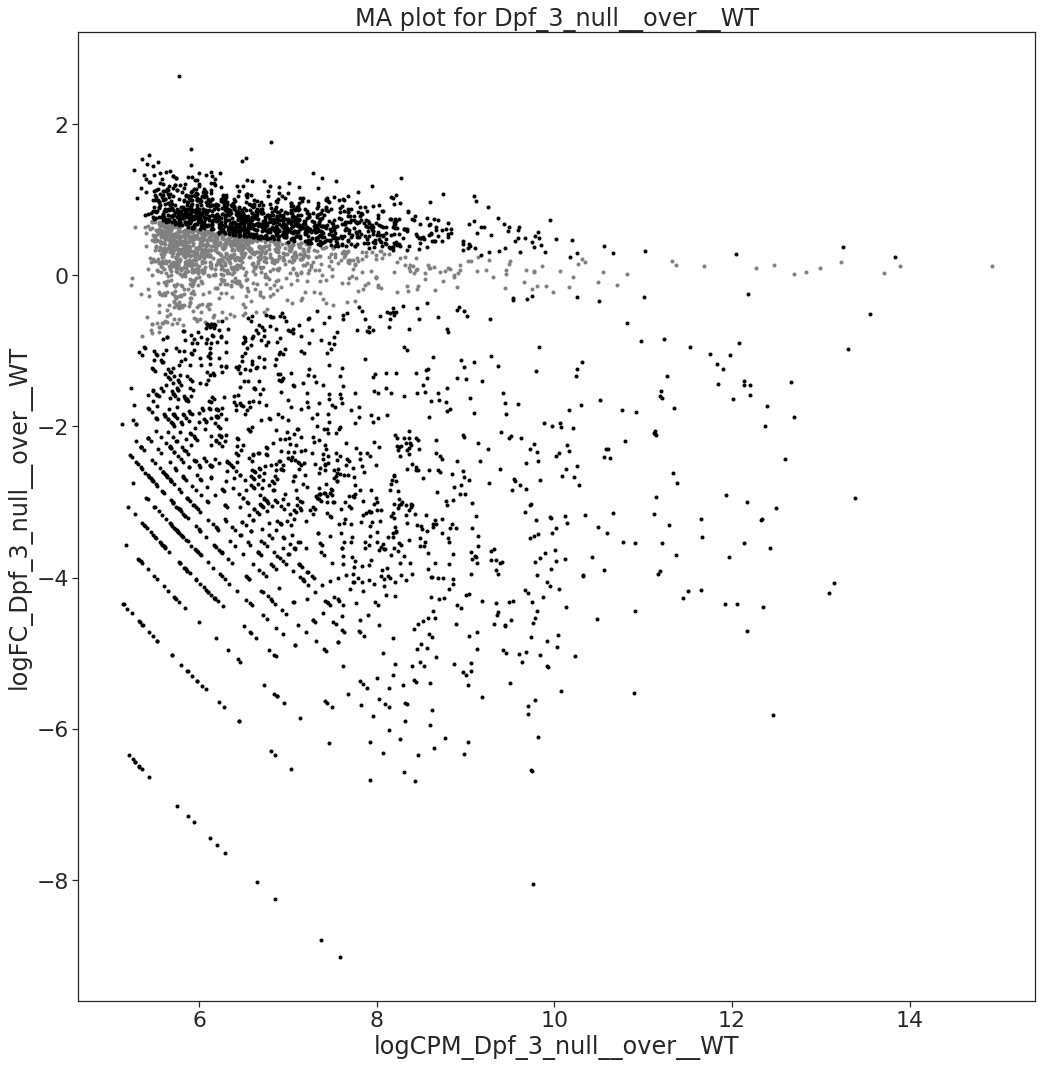

In [36]:
sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05"],
                      palette=["gray", "black"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out=legend_out)
sns_plot = plt.gca()
sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

In [37]:
df[df["sequence_Dpf_3_null__over__WT"] == "ZC15.3"]

id  logFC_Dpf_3_null__over__WT  logCPM_Dpf_3_null__over__WT  \
2529  WBGene00013832 -3.791408                    9.783277                      

      LR_Dpf_3_null__over__WT  PValue_Dpf_3_null__over__WT  \
2529  497.233503               3.801084e-110                 

      FDR_Dpf_3_null__over__WT  taxonomy_id_Dpf_3_null__over__WT  \
2529  1.641985e-108             6239.0                             

     gene_name_Dpf_3_null__over__WT sequence_Dpf_3_null__over__WT  \
2529  NaN                            ZC15.3                         

     status_Dpf_3_null__over__WT gene_biotype_Dpf_3_null__over__WT  \
2529  Live                        protein_coding_gene                

     repName_Dpf_3_null__over__WT repClass_Dpf_3_null__over__WT  \
2529  NaN                          NaN                            

     repFamily_Dpf_3_null__over__WT Significant_Dpf_3_null__over__WT  
2529  NaN                            FDR<0.05

In [38]:
df.columns

Index(['id', 'logFC_Dpf_3_null__over__WT', 'logCPM_Dpf_3_null__over__WT',
       'LR_Dpf_3_null__over__WT', 'PValue_Dpf_3_null__over__WT',
       'FDR_Dpf_3_null__over__WT', 'taxonomy_id_Dpf_3_null__over__WT',
       'gene_name_Dpf_3_null__over__WT', 'sequence_Dpf_3_null__over__WT',
       'status_Dpf_3_null__over__WT', 'gene_biotype_Dpf_3_null__over__WT',
       'repName_Dpf_3_null__over__WT', 'repClass_Dpf_3_null__over__WT',
       'repFamily_Dpf_3_null__over__WT', 'Significant_Dpf_3_null__over__WT'],
      dtype='object')

In [39]:
df["gene_biotype_Dpf_3_null__over__WT"].value_counts()

protein_coding_gene    3351
Name: gene_biotype_Dpf_3_null__over__WT, dtype: int64

In [40]:
df[df["gene_biotype_Dpf_3_null__over__WT"].isna()].shape

(580, 15)

In [41]:
df["Significant_Dpf_3_null__over__WT"].value_counts()

FDR<0.05    2777
No          1154
Name: Significant_Dpf_3_null__over__WT, dtype: int64

In [42]:
# mark all
df["Significant_Dpf_3_null__over__WT"]  = "No"

In [43]:
df.loc[(df["gene_biotype_Dpf_3_null__over__WT"].isna() == True) 
       , "Significant_Dpf_3_null__over__WT"] = "repeat and not down"

In [44]:
# mark the ones that go down
df.loc[(df["FDR_Dpf_3_null__over__WT"] < 0.05) &
       (df["logFC_Dpf_3_null__over__WT"]<0)
       , "Significant_Dpf_3_null__over__WT"] = "FDR<0.05 and logFC<0"

In [45]:
df.loc[(df["FDR_Dpf_3_null__over__WT"] < 0.05) &
       (df["logFC_Dpf_3_null__over__WT"]<0) &
       (df["gene_biotype_Dpf_3_null__over__WT"].isna() == True) 
       , "Significant_Dpf_3_null__over__WT"] = "FDR<0.05 and logFC<0 & repeat"

In [46]:
df["Significant_Dpf_3_null__over__WT"].value_counts()

No                               2287
FDR<0.05 and logFC<0             1064
FDR<0.05 and logFC<0 & repeat    539 
repeat and not down              41  
Name: Significant_Dpf_3_null__over__WT, dtype: int64

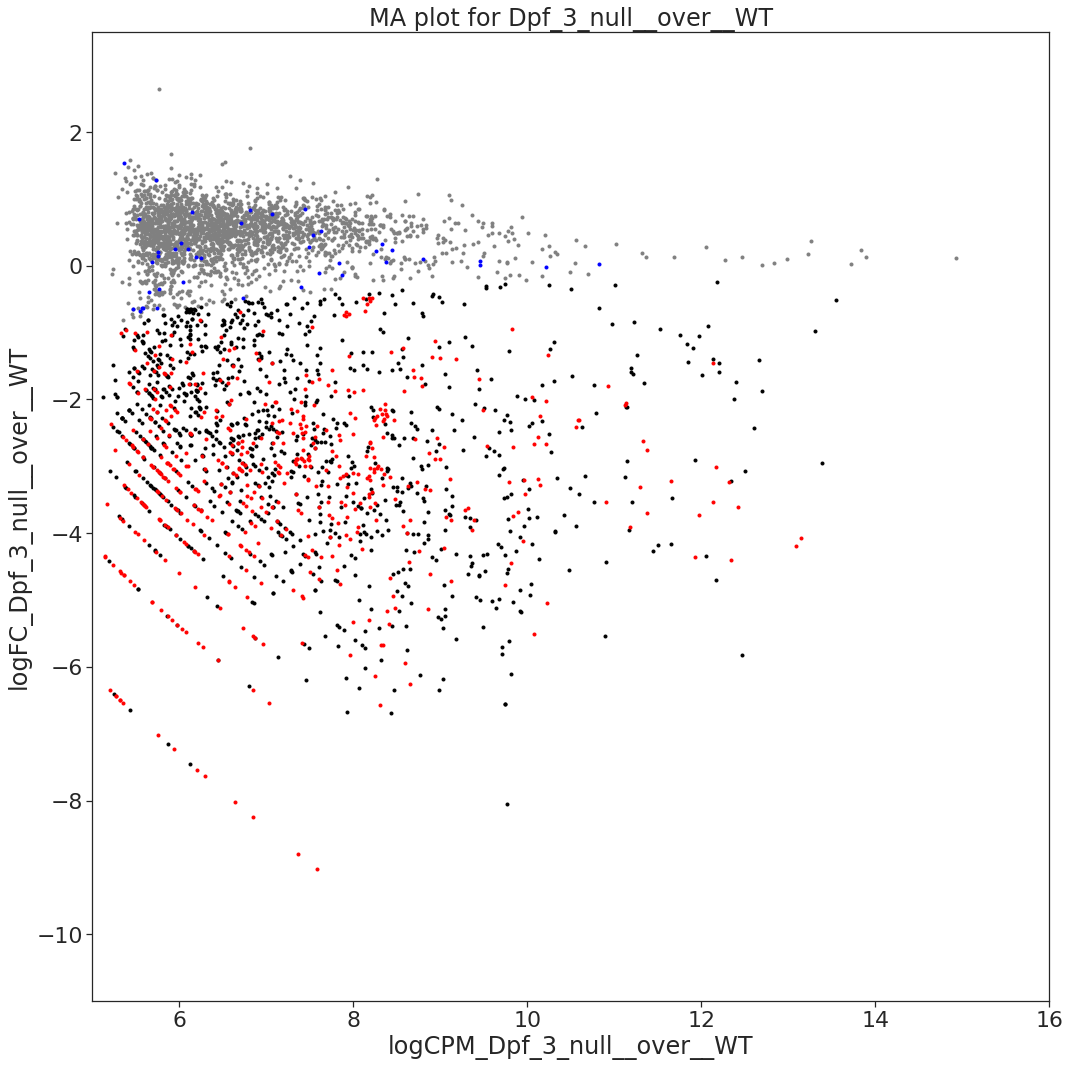

In [47]:
sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05 and logFC<0", "FDR<0.05 and logFC<0 & repeat", "repeat and not down"],
                      palette=["grey", "black", "red", "blue"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out=legend_out)
sns_plot = plt.gca()
sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"{df_name}_MARK_downregulated_repeats.pdf")

# repeat the same for Dpf-3 point mutant

In [49]:
df_path = small_rna__WT__Dpf_3_S784A_path
df_name = small_rna__WT__Dpf_3_S784A_name

In [50]:
df = prepare_df(df_path, df_name)

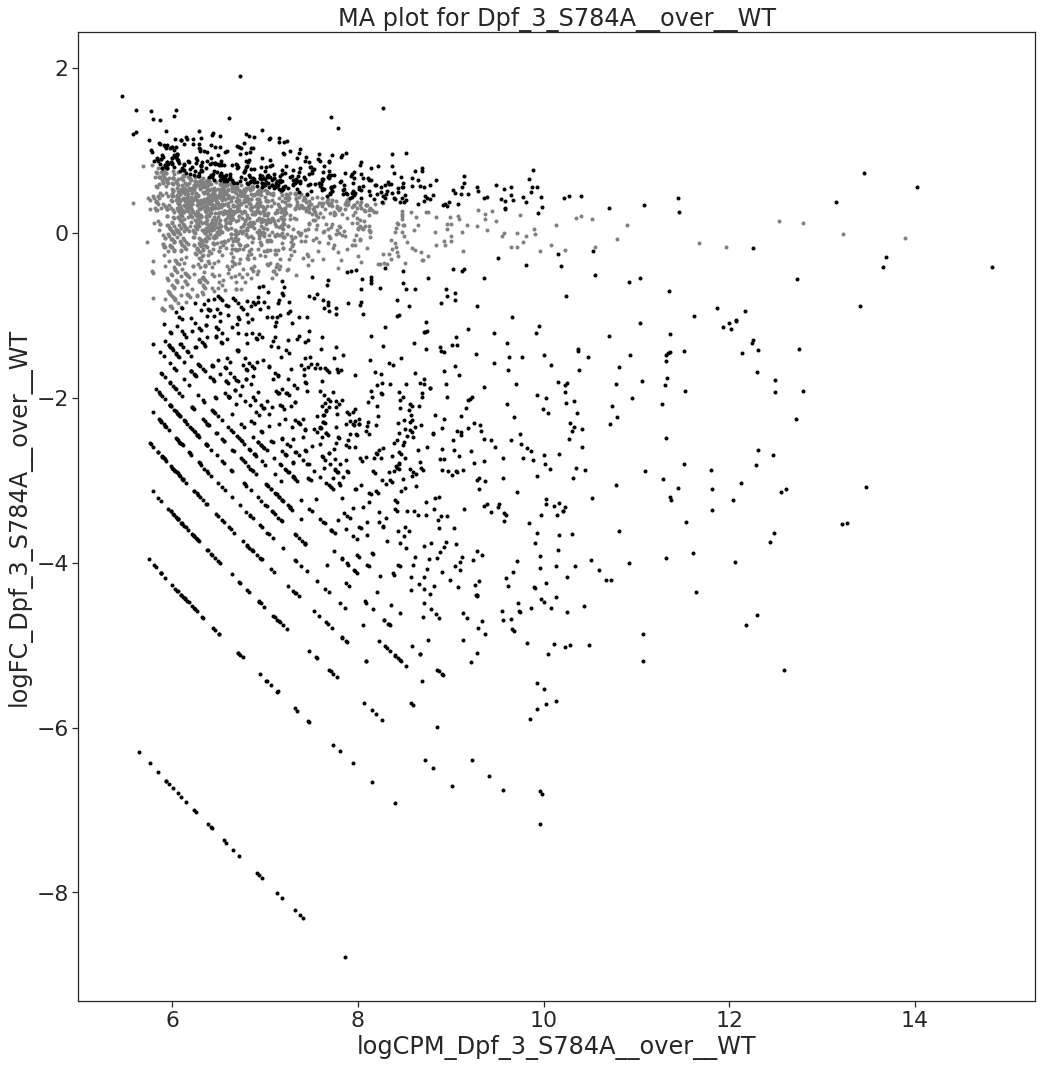

In [51]:
sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05"],
                      palette=["gray", "black"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out=legend_out)
sns_plot = plt.gca()
sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

In [52]:
df["gene_biotype_Dpf_3_S784A__over__WT"].value_counts()

protein_coding_gene    2704
Name: gene_biotype_Dpf_3_S784A__over__WT, dtype: int64

In [53]:
df[df["gene_biotype_Dpf_3_S784A__over__WT"].isna()].shape

(530, 15)

In [56]:
df["Significant_Dpf_3_S784A__over__WT"].value_counts()

FDR<0.05    1863
No          1371
Name: Significant_Dpf_3_S784A__over__WT, dtype: int64

In [57]:
# mark all
df["Significant_Dpf_3_S784A__over__WT"]  = "No"

In [58]:
df.loc[(df["gene_biotype_Dpf_3_S784A__over__WT"].isna() == True) 
       , "Significant_Dpf_3_S784A__over__WT"] = "repeat and not down"

In [59]:
# mark the ones that go down
df.loc[(df["FDR_Dpf_3_S784A__over__WT"] < 0.05) &
       (df["logFC_Dpf_3_S784A__over__WT"]<0)
       , "Significant_Dpf_3_S784A__over__WT"] = "FDR<0.05 and logFC<0"

In [60]:
df.loc[(df["FDR_Dpf_3_S784A__over__WT"] < 0.05) &
       (df["logFC_Dpf_3_S784A__over__WT"]<0) &
       (df["gene_biotype_Dpf_3_S784A__over__WT"].isna() == True) 
       , "Significant_Dpf_3_S784A__over__WT"] = "FDR<0.05 and logFC<0 & repeat"

In [61]:
df["Significant_Dpf_3_S784A__over__WT"].value_counts()

No                               1794
FDR<0.05 and logFC<0             910 
FDR<0.05 and logFC<0 & repeat    483 
repeat and not down              47  
Name: Significant_Dpf_3_S784A__over__WT, dtype: int64

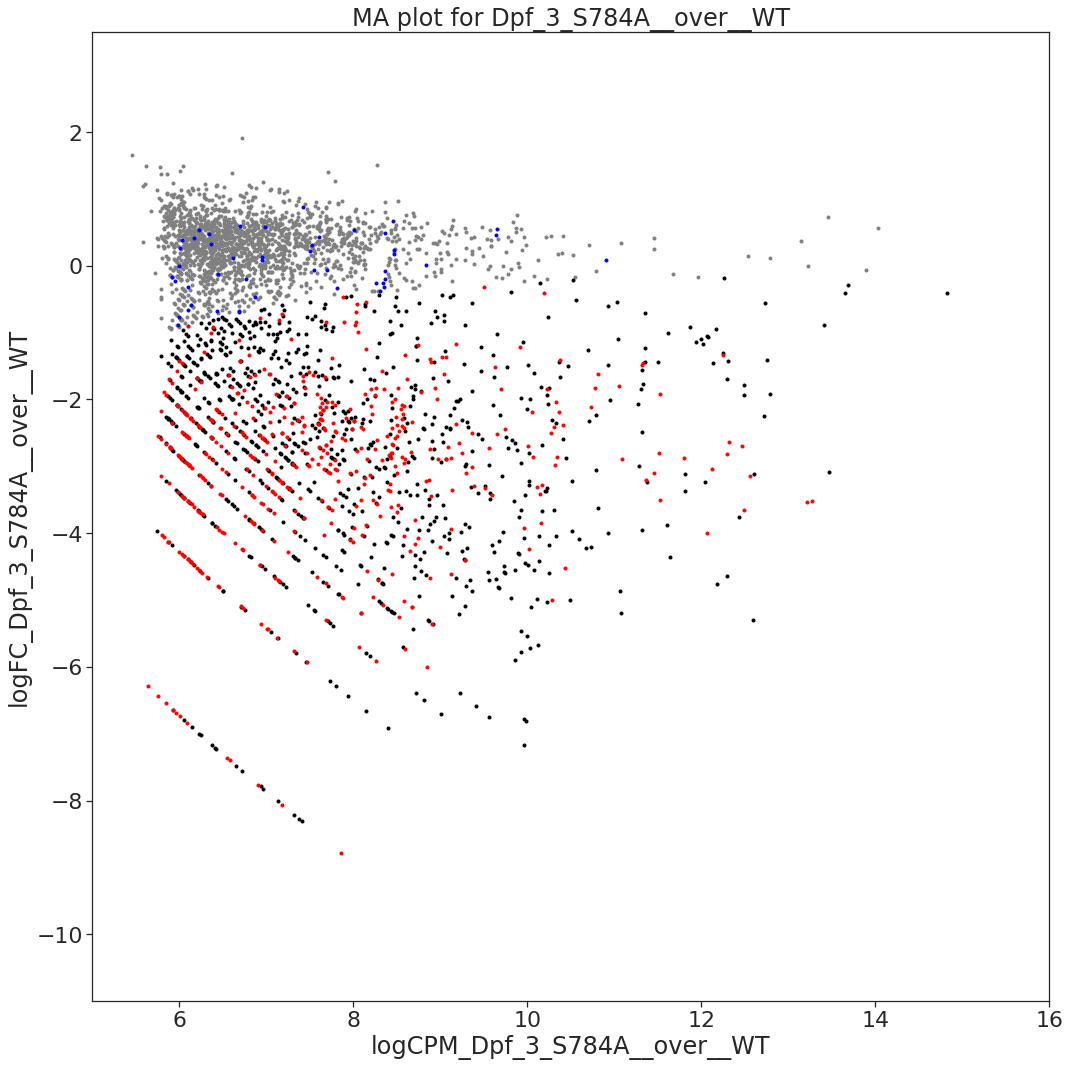

In [62]:
sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05 and logFC<0", "FDR<0.05 and logFC<0 & repeat", "repeat and not down"],
                      palette=["grey", "black", "red", "blue"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out=legend_out)
sns_plot = plt.gca()
sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"{df_name}_MARK_downregulated_repeats.pdf")

# repeat the same for mut-2

In [63]:
df_path = small_rna__WT__mut_2_path
df_name = small_rna__WT__mut_2_name

In [64]:
df = prepare_df(df_path, df_name)

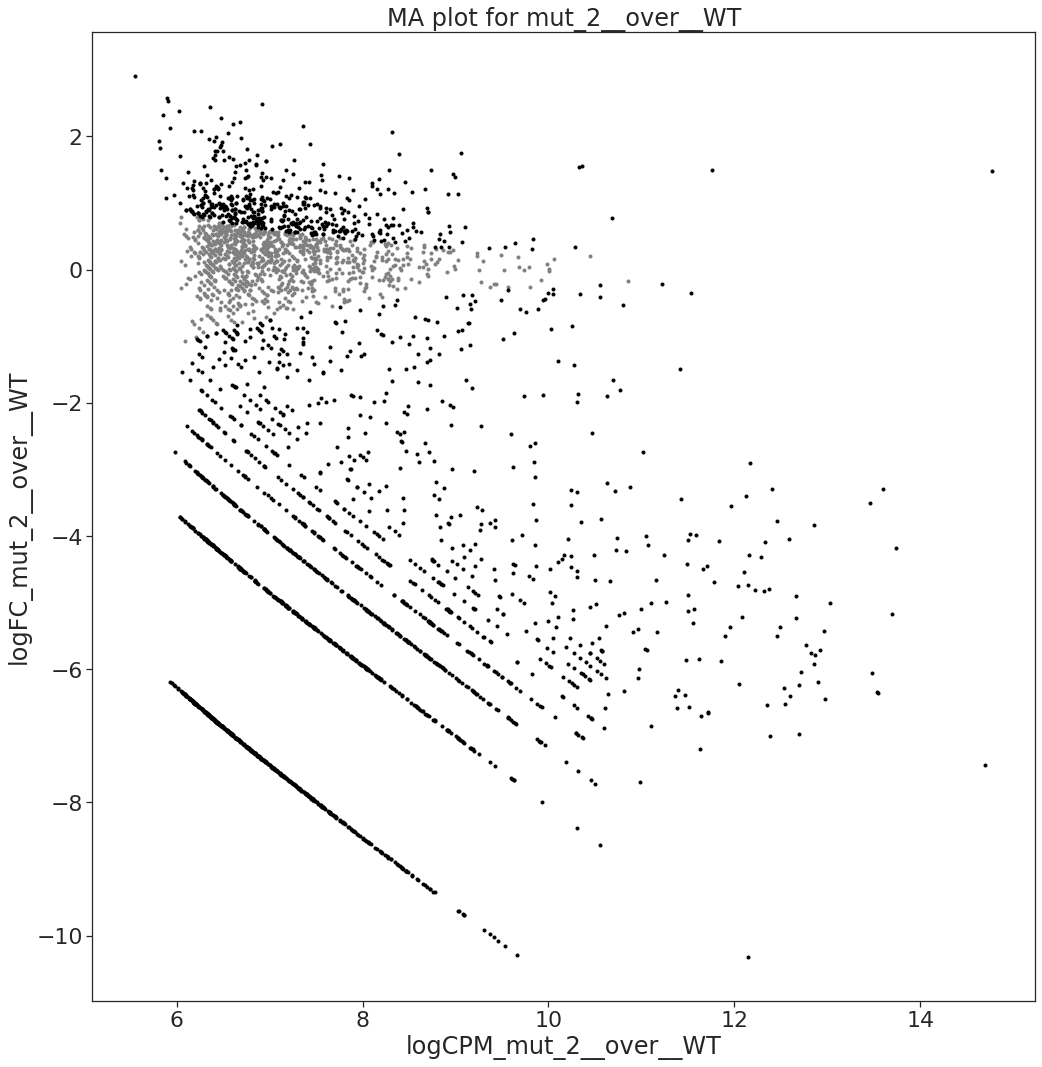

In [65]:
sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05"],
                      palette=["gray", "black"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out=legend_out)
sns_plot = plt.gca()
sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)

In [66]:
df["gene_biotype_mut_2__over__WT"].value_counts()

protein_coding_gene    2700
Name: gene_biotype_mut_2__over__WT, dtype: int64

In [67]:
df[df["gene_biotype_mut_2__over__WT"].isna()].shape

(527, 15)

In [68]:
df["Significant_mut_2__over__WT"].value_counts()

FDR<0.05    2265
No          962 
Name: Significant_mut_2__over__WT, dtype: int64

In [69]:
# mark all
df["Significant_mut_2__over__WT"]  = "No"

In [70]:
df.loc[(df["gene_biotype_mut_2__over__WT"].isna() == True) 
       , "Significant_mut_2__over__WT"] = "repeat and not down"

In [71]:
# mark the ones that go down
df.loc[(df["FDR_mut_2__over__WT"] < 0.05) &
       (df["logFC_mut_2__over__WT"]<0)
       , "Significant_mut_2__over__WT"] = "FDR<0.05 and logFC<0"

In [72]:
df.loc[(df["FDR_mut_2__over__WT"] < 0.05) &
       (df["logFC_mut_2__over__WT"]<0) &
       (df["gene_biotype_mut_2__over__WT"].isna() == True) 
       , "Significant_mut_2__over__WT"] = "FDR<0.05 and logFC<0 & repeat"

In [73]:
df["Significant_mut_2__over__WT"].value_counts()

No                               1434
FDR<0.05 and logFC<0             1266
FDR<0.05 and logFC<0 & repeat    516 
repeat and not down              11  
Name: Significant_mut_2__over__WT, dtype: int64

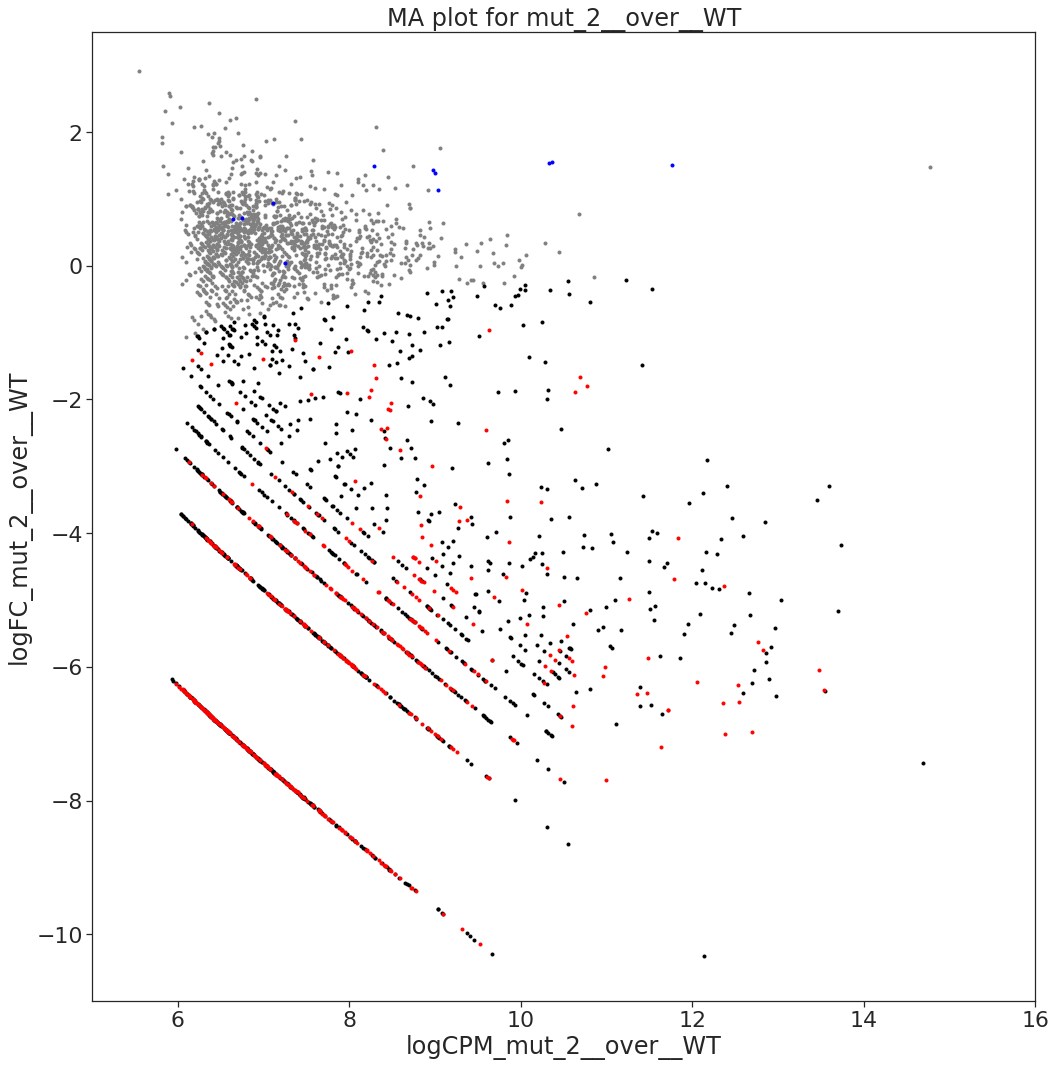

In [74]:
sns_plot = sns.lmplot(x=f"logCPM_{df_name}",
                      y=f"logFC_{df_name}",
                      data=df,
                      fit_reg=False,
                      hue=f"Significant_{df_name}",
                      hue_order=["No", "FDR<0.05 and logFC<0", "FDR<0.05 and logFC<0 & repeat", "repeat and not down"],
                      palette=["grey", "black", "red", "blue"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out=legend_out)
sns_plot = plt.gca()
sns_plot.set_title(f"MA plot for {df_name}")
sns_plot.spines['right'].set_visible(True)
sns_plot.spines['top'].set_visible(True)
sns_plot.set(xlim=xlim, ylim=ylim)

plt.savefig(f"{df_name}_MARK_downregulated_repeats.pdf")